In [25]:
import pandas as pd

# Carico il dataframe CSV DOMESTICTERRORWEB.csv
df_terror = pd.read_csv('./Dataset - Terror Web Links/DOMESTICTERRORWEB.csv')

#### Visualizzazione Rete \(Spring Layout, non prendere in considerazione\)



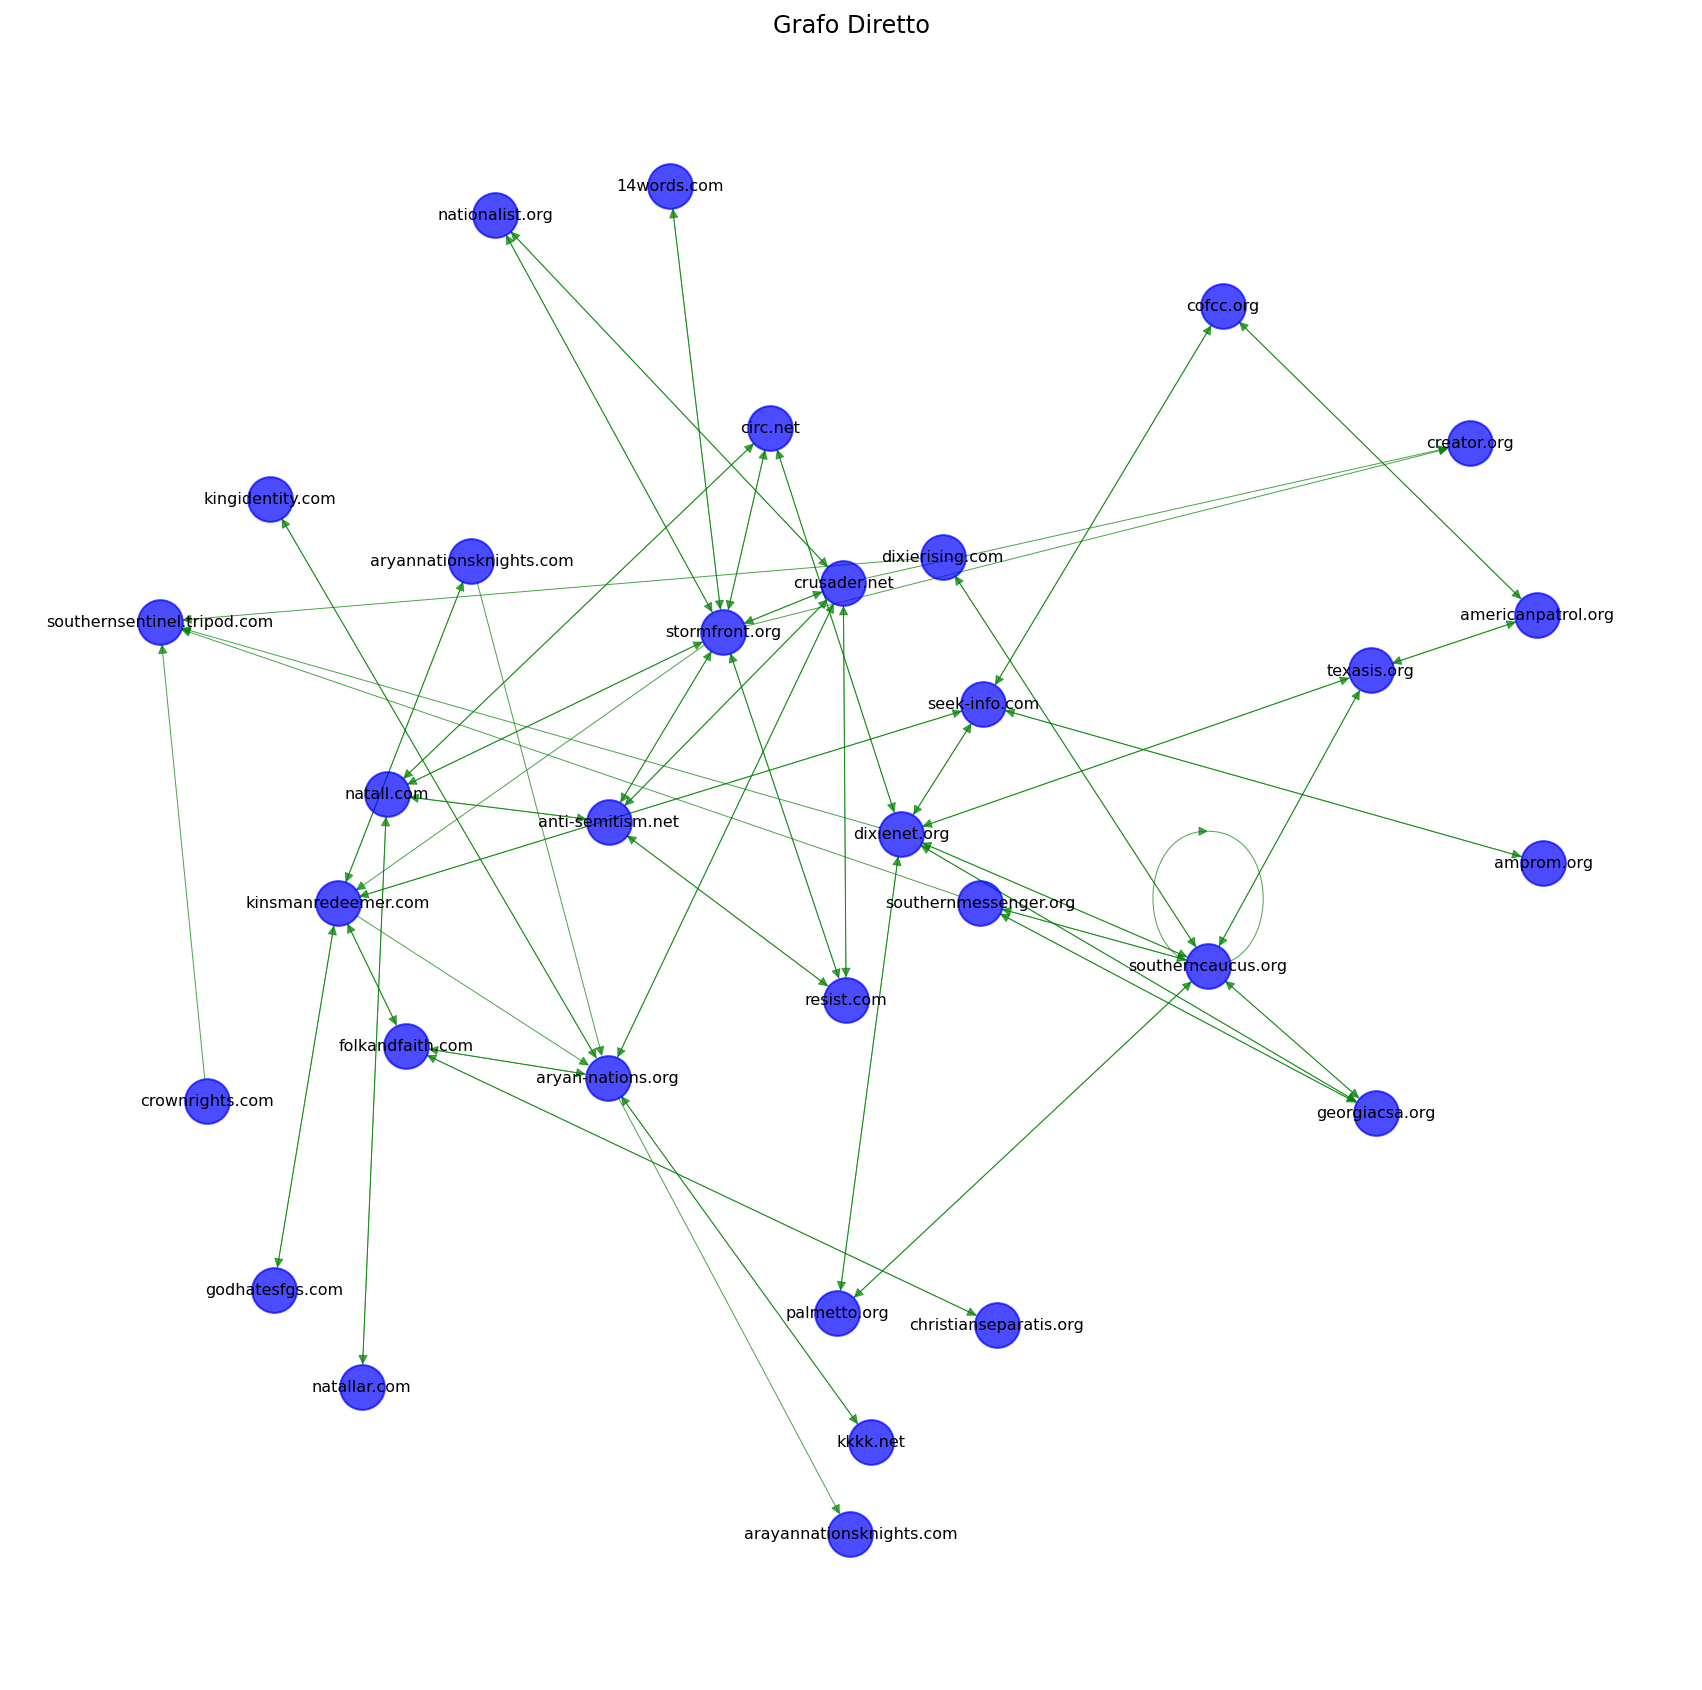

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.spring_layout(G_directed, k=1.8, iterations=100, seed=38)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = 500

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()

#### Visualizzazione tramite algoritmo Kamada\-Kawai



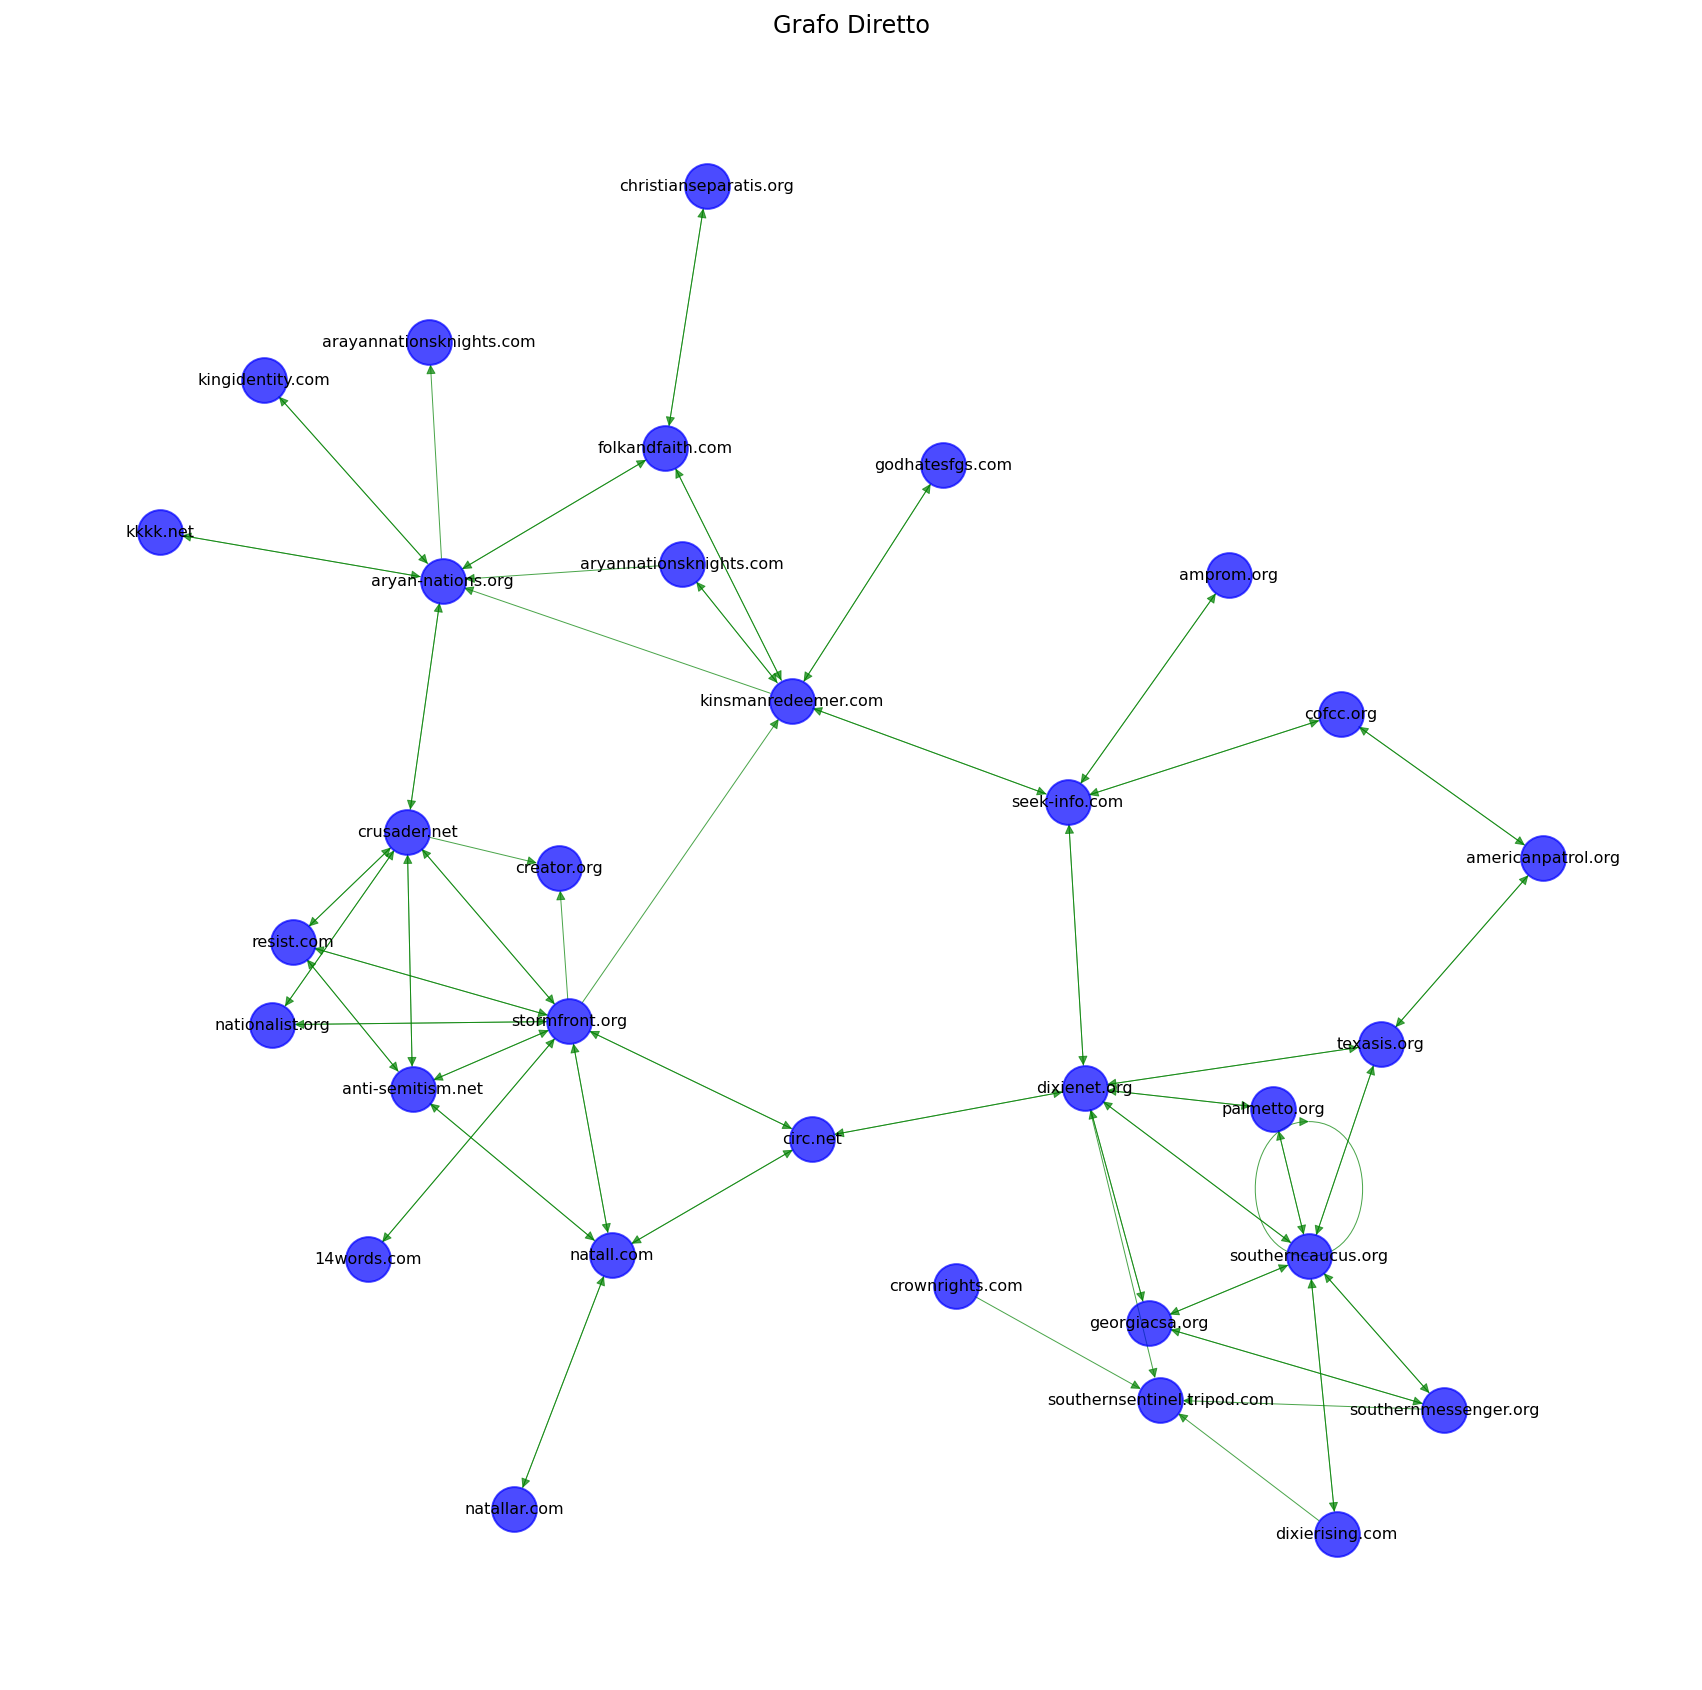

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = 500

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()

#### Visualizzazione tramite algoritmo Kamada\-Kawai in base al numero di archi entranti \(nodi più grandi hanno un numero maggiore di archi entranti, misuro così la popolarità\)



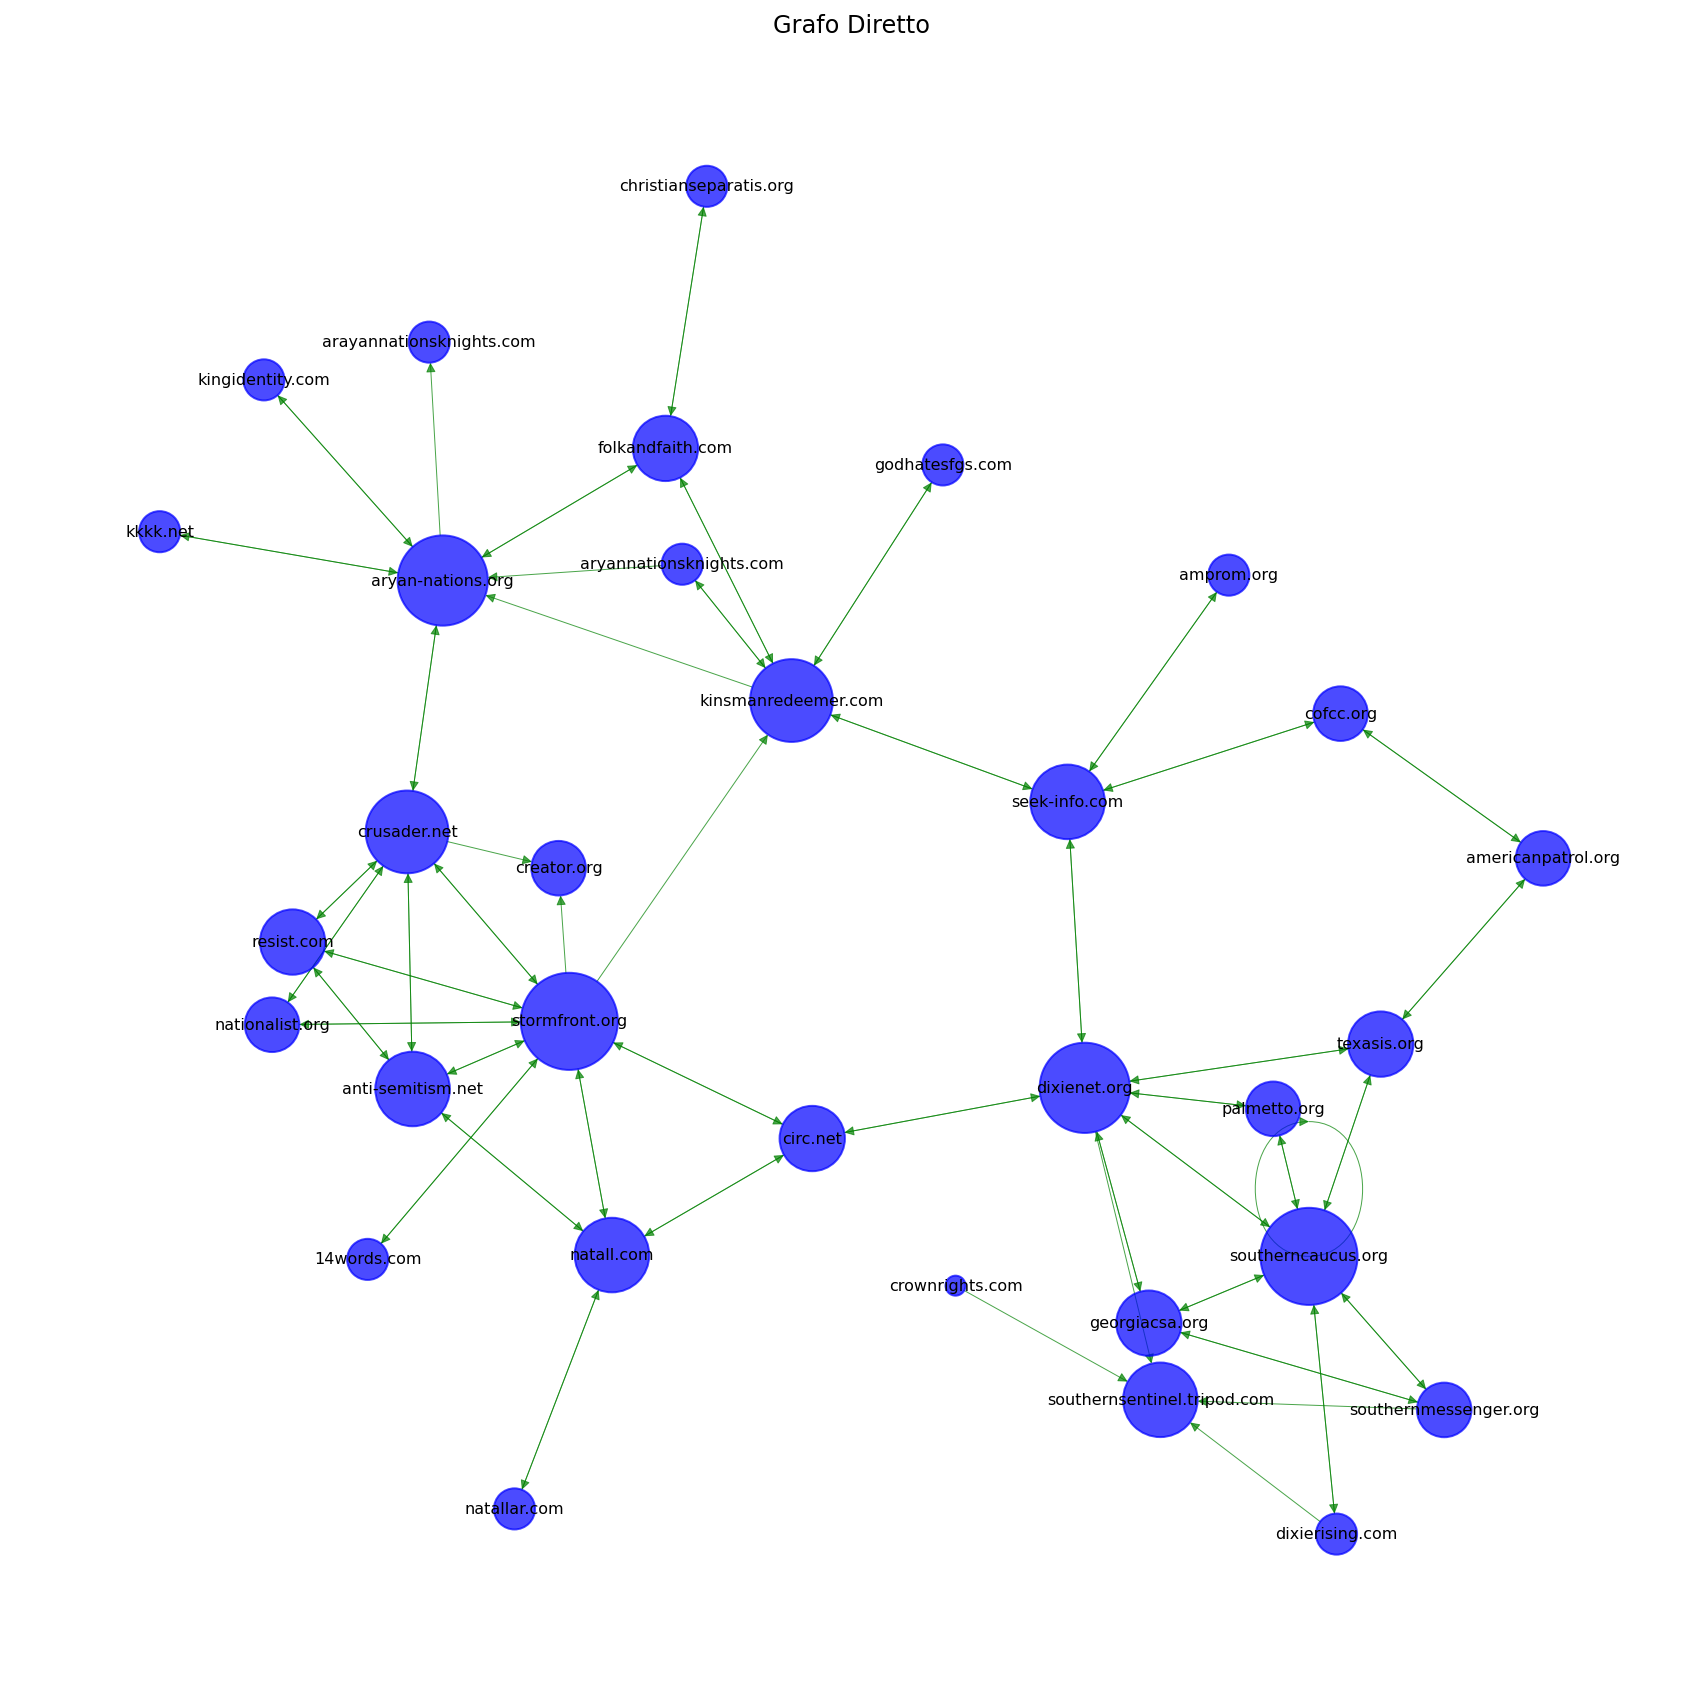

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.in_degree_centrality(G_directed).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi più popolari \(con più nodi entranti\)



In [29]:
n = 10    # numero di nodi da stampare
in_degree_centrality = nx.in_degree_centrality(G_directed)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_nodes = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior numero di archi entranti sono:")
for node, centrality in top_n_nodes:
    
    print(f"{i}. Sito: {node}, Centralità di Grado in Entrata: {centrality}")
    i+=1

Classifica 10 siti con il maggior numero di archi entranti sono:
1. Sito: southerncaucus.org, Centralità di Grado in Entrata: 0.22580645161290322
2. Sito: stormfront.org, Centralità di Grado in Entrata: 0.22580645161290322
3. Sito: aryan-nations.org, Centralità di Grado in Entrata: 0.1935483870967742
4. Sito: dixienet.org, Centralità di Grado in Entrata: 0.1935483870967742
5. Sito: crusader.net, Centralità di Grado in Entrata: 0.16129032258064516
6. Sito: kinsmanredeemer.com, Centralità di Grado in Entrata: 0.16129032258064516
7. Sito: anti-semitism.net, Centralità di Grado in Entrata: 0.12903225806451613
8. Sito: natall.com, Centralità di Grado in Entrata: 0.12903225806451613
9. Sito: seek-info.com, Centralità di Grado in Entrata: 0.12903225806451613
10. Sito: southernsentinel.tripod.com, Centralità di Grado in Entrata: 0.12903225806451613


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base alla Eigenvector Centrality \(nodi più grandi hanno un numero maggiore di connessioni con nodi "importanti"\)



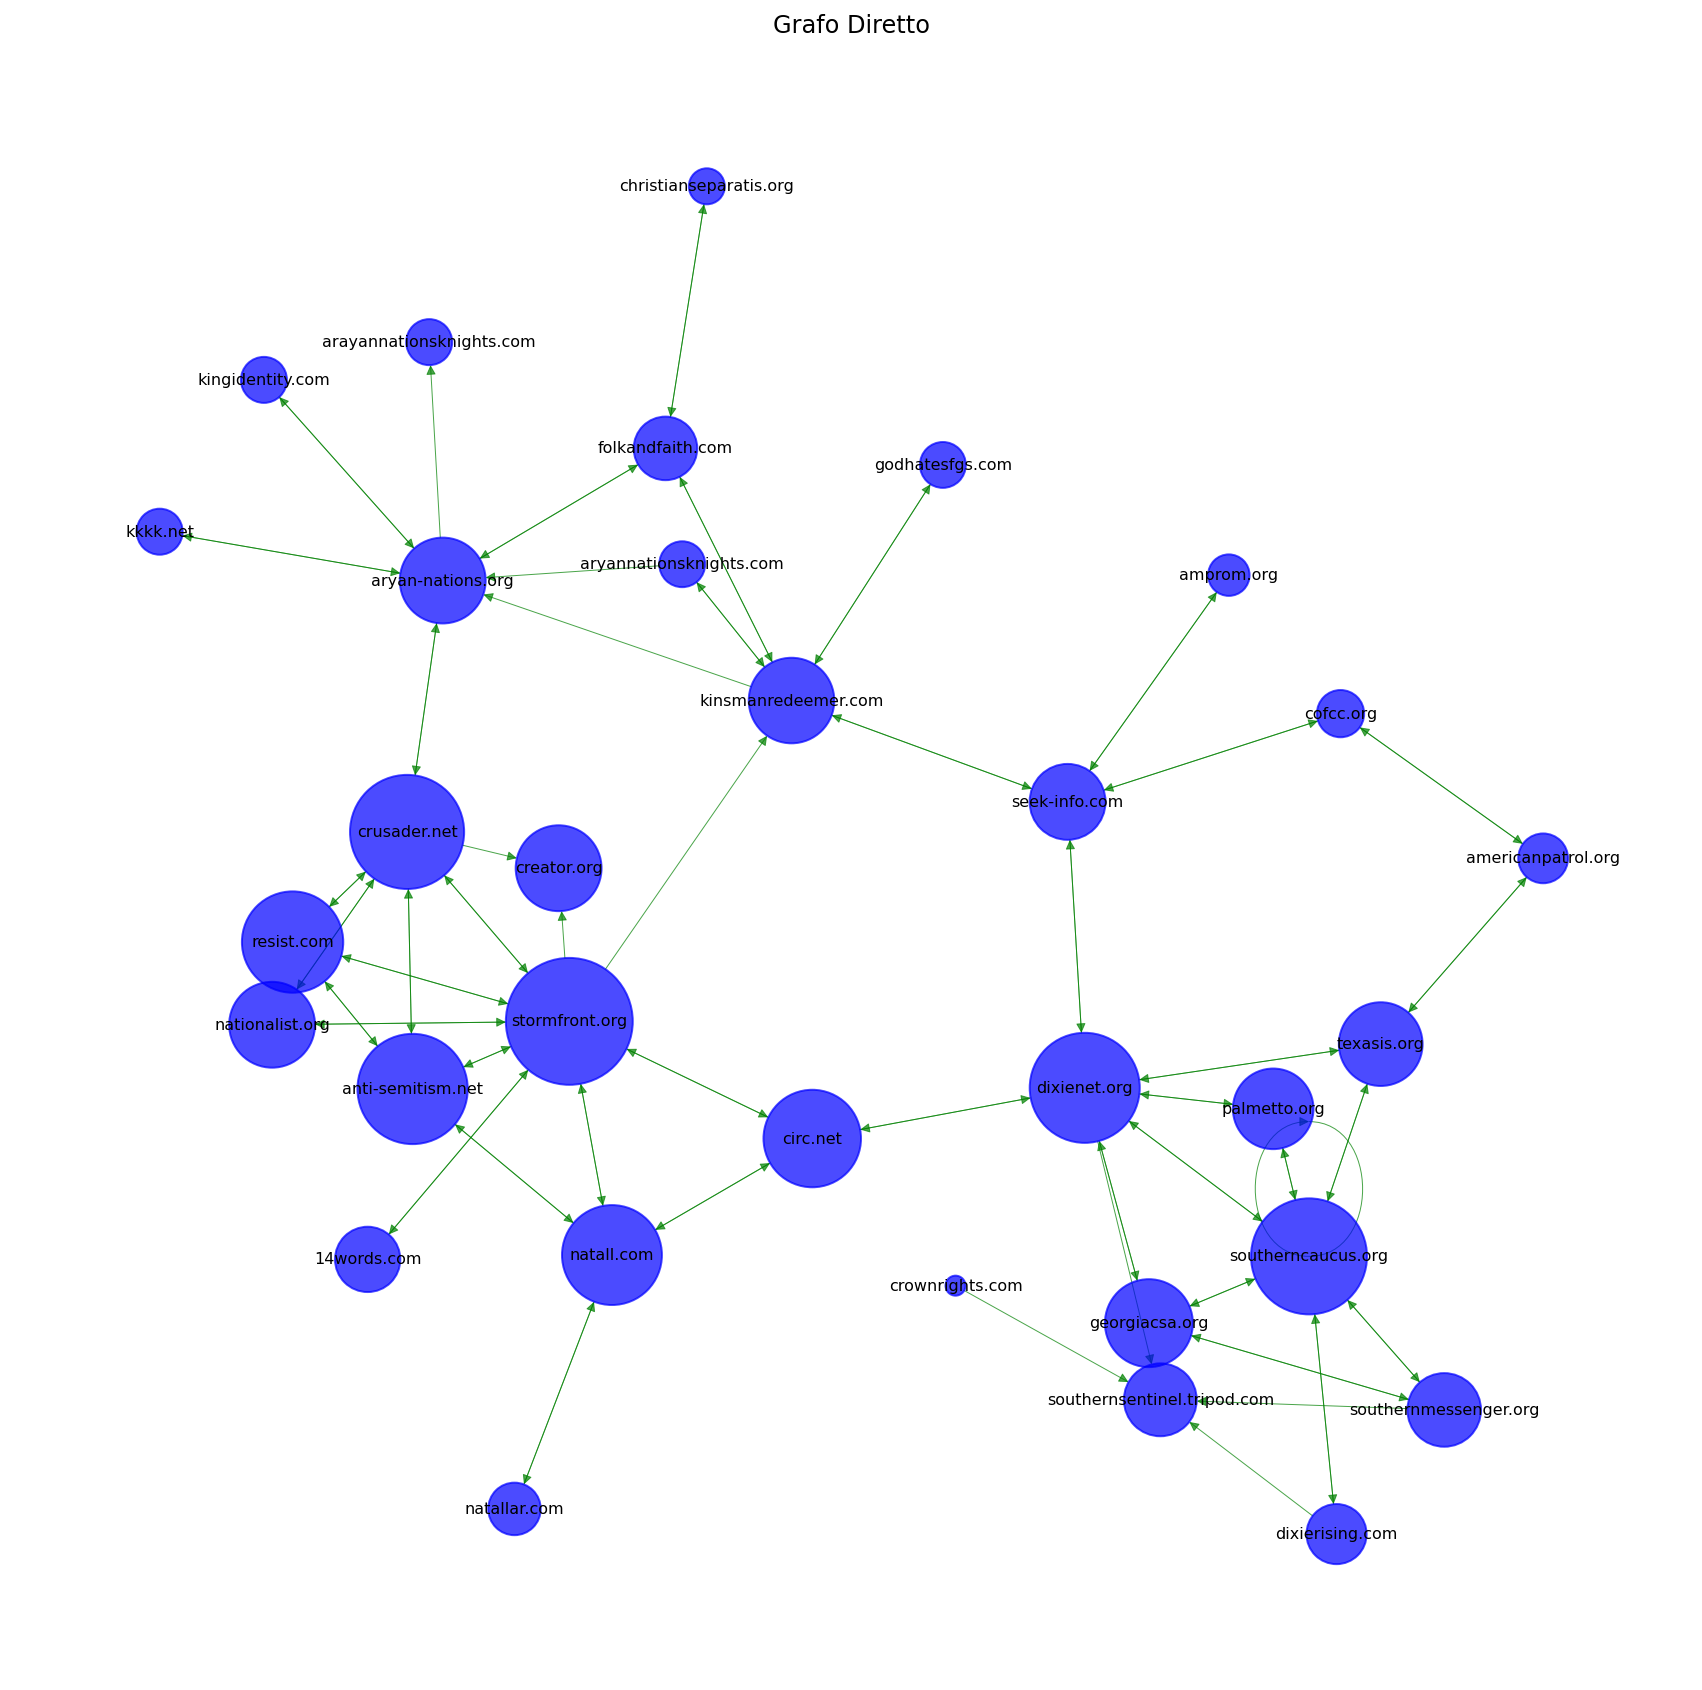

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.eigenvector_centrality(G_directed, max_iter=500).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi con valori di Eigenvector Centrality maggiori



In [31]:
# ATTENZIONE! NON FA DIFFERENZA TRA NODI ENTRANTI E USCENTI! VUOL DIRE CHE NODI CHE NON SONO PUNTATI DA NODI IMPORTANTI MA CHE PUNTANO (E BASTA) A NODI IMPORTANTI SONO CONSIDERATI IMPORTANTI A LORO VOLTA
# STANDO ALLA DOCUMENTAZIONE QUESTO CALCOLA EIGENVECTOR RIGHT --> misura l'importanza di un nodo come fonte di informazioni o influenza.
# per calcolare anche la eigenvector left, invertire i collegamenti del grafo

n = 10    # numero di nodi da stampare
eigenvector_centrality = nx.eigenvector_centrality(G_directed, max_iter = 500)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Eigenvector Centrality:")
for node, centrality in top_n_eigenvector_nodes:
    
    print(f"{i}. Sito: {node}, Centralità: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Eigenvector Centrality:
1. Sito: stormfront.org, Centralità: 0.3926026919699552
2. Sito: southerncaucus.org, Centralità: 0.32652597981863796
3. Sito: crusader.net, Centralità: 0.31562254291888964
4. Sito: anti-semitism.net, Centralità: 0.29408179420754904
5. Sito: dixienet.org, Centralità: 0.2928185159954462
6. Sito: resist.com, Centralità: 0.24674418061525308
7. Sito: natall.com, Centralità: 0.23962890949946963
8. Sito: circ.net, Centralità: 0.22772677859410775
9. Sito: georgiacsa.org, Centralità: 0.1833735657546251
10. Sito: creator.org, Centralità: 0.17434824378312247


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base alla Katz Centrality \(nodi piu grandi sono piu \-&gt; non lo so\)



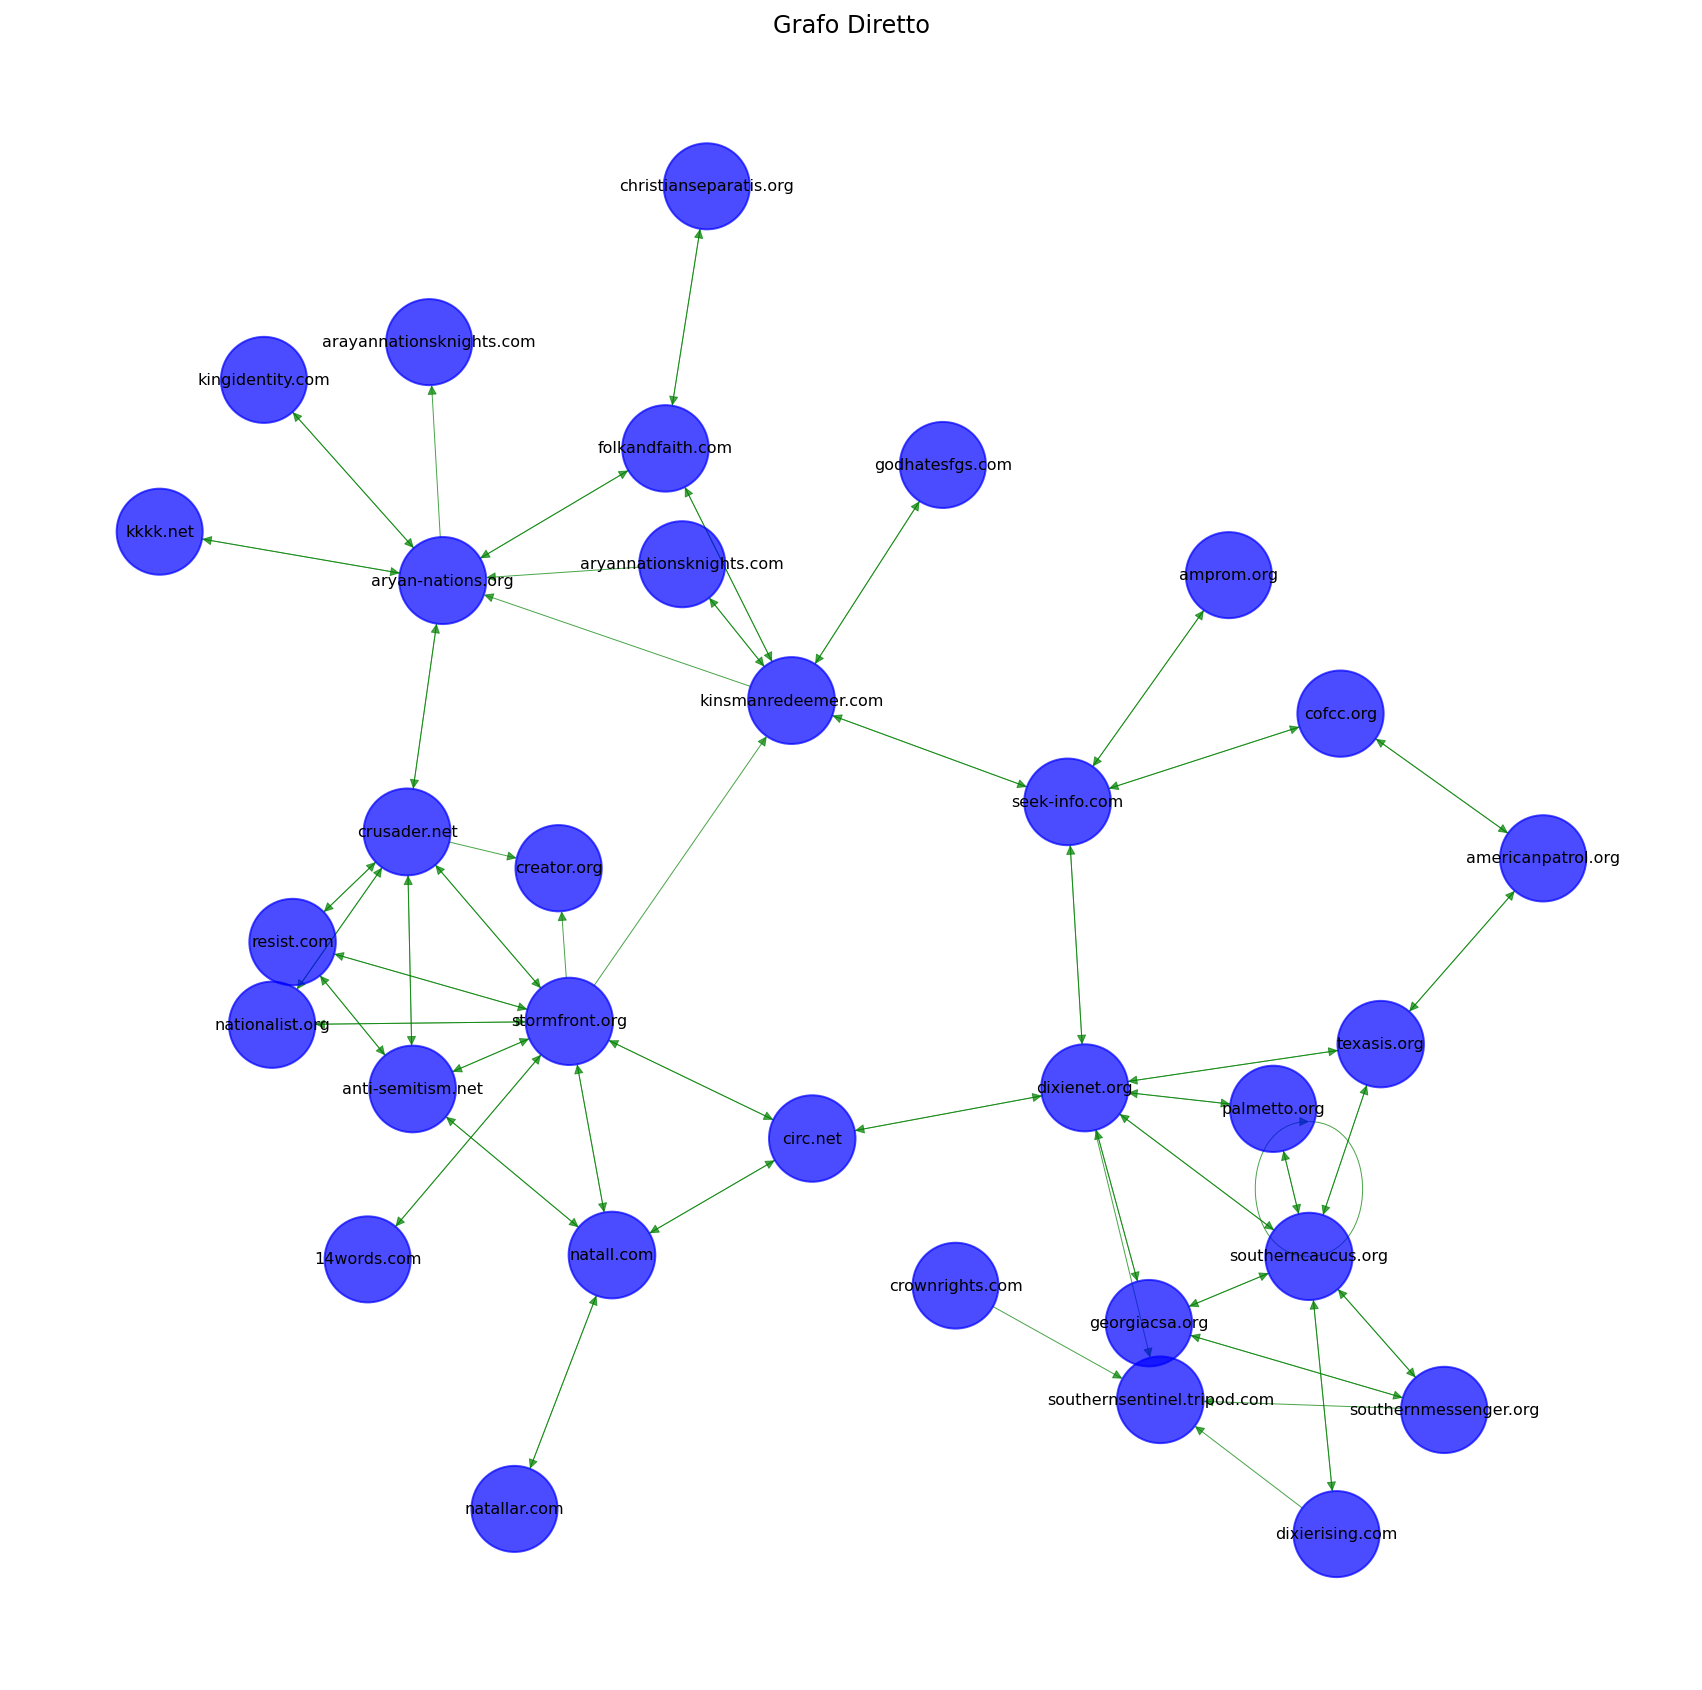

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.katz_centrality(G_directed,alpha=0.005, max_iter=500).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, node_size=node_size,alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi con valori di Katz Centrality maggiori



In [33]:
# ATTENZIONE! VALORI MOLTO SIMILI, FORSE DA REGOLARE ALPHA (O FORSE VALORI TIPICI DELLA RETE CONSIDERATA)

n = 10    # numero di nodi da stampare
katz_centrality = nx.katz_centrality(G_directed, alpha=0.005, max_iter=500)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_katz_nodes = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Katz Centrality:")
for node, centrality in top_n_katz_nodes:
    
    print(f"{i}. Sito: {node}, Centralità di Grado in Entrata: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Katz Centrality:
1. Sito: southerncaucus.org, Centralità di Grado in Entrata: 0.18050148789317044
2. Sito: stormfront.org, Centralità di Grado in Entrata: 0.1804928156645363
3. Sito: dixienet.org, Centralità di Grado in Entrata: 0.1796211217176918
4. Sito: aryan-nations.org, Centralità di Grado in Entrata: 0.17959428693811977
5. Sito: crusader.net, Centralità di Grado in Entrata: 0.1787493662231877
6. Sito: kinsmanredeemer.com, Centralità di Grado in Entrata: 0.17872261924434774
7. Sito: anti-semitism.net, Centralità di Grado in Entrata: 0.17786460075172375
8. Sito: natall.com, Centralità di Grado in Entrata: 0.17784688145286867
9. Sito: seek-info.com, Centralità di Grado in Entrata: 0.177842211673983
10. Sito: southernsentinel.tripod.com, Centralità di Grado in Entrata: 0.1778202257606459


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base all'Hyperlink\-induced topic search \(HITS\) per autorità \(nodi piu grandi sono più autorevoli \(vengono puntati da tanti nodi\)\)



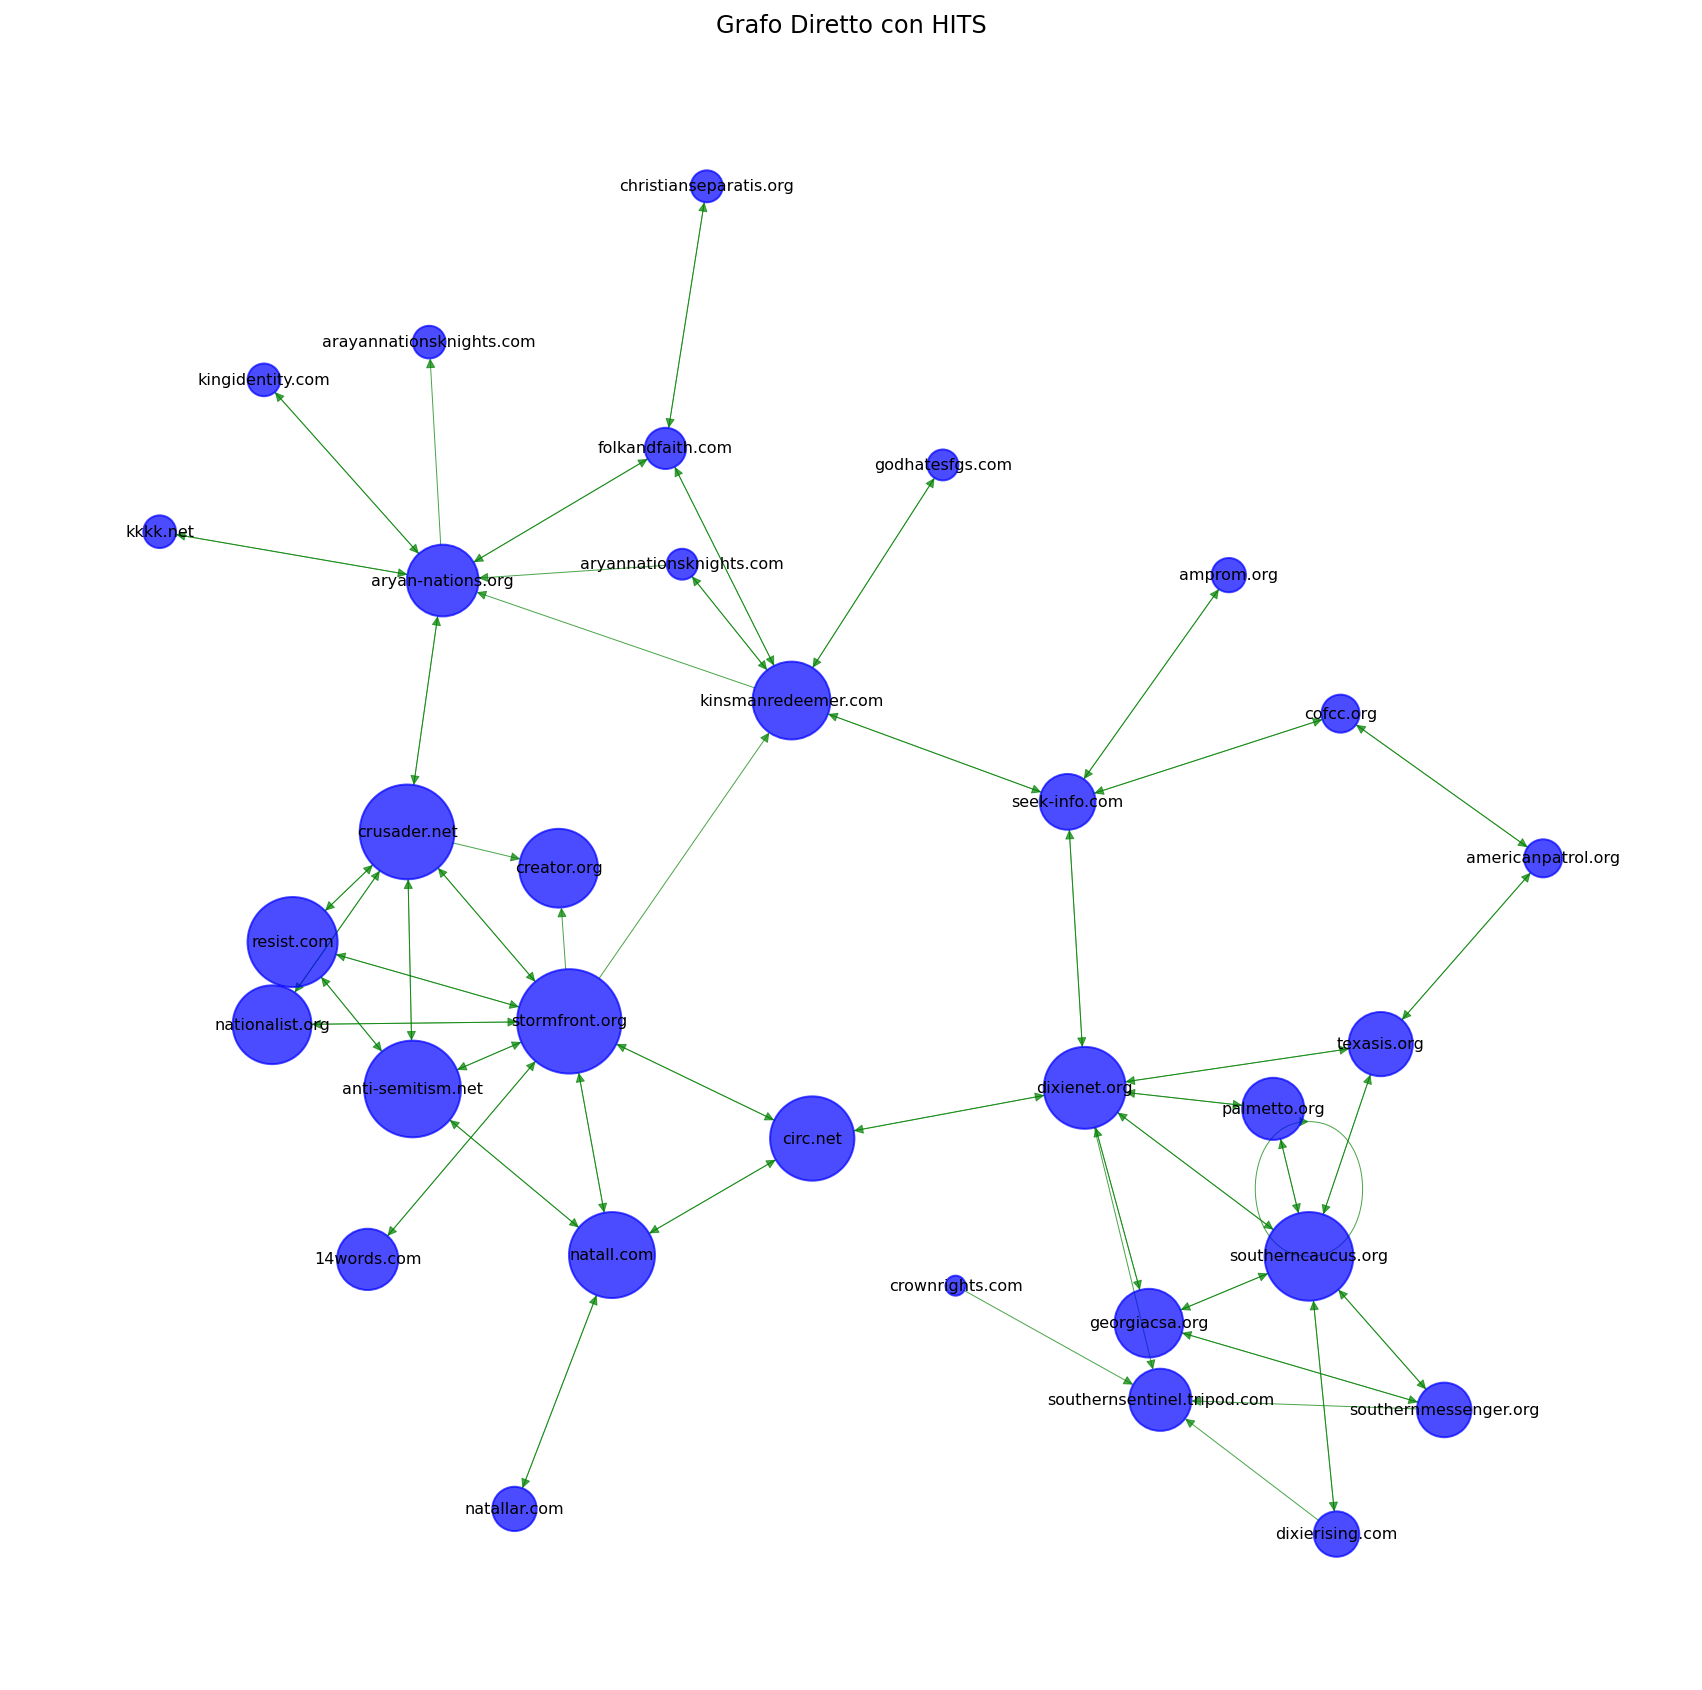

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcola i punteggi HITS (ritorna due dizionari per autorità e hub)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Scegli se utilizzare i punteggi di autorità o hub per la dimensione dei nodi
# In questo esempio, usiamo i punteggi di autorità
node_size = [authorities[n] * 30000 + 100 for n in G_directed.nodes()]

# Visualizza il grafo con i punteggi HITS
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto con HITS')
plt.show()


#### Calcolo n archi con valori di HITS Centrality maggiori \(autorità\)



In [35]:
import networkx as nx

# Supponendo che G_directed sia il tuo grafo diretto già definito

# Calcola i punteggi HITS (hubs e authorities)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Numero di nodi da stampare
n = 10

# Ordina i nodi per punteggio di autorità e seleziona i primi n
top_n_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:n]

# Stampa i primi n siti con il maggior valore di autorità
print(f"Classifica {n} siti con il maggior valore di autorità:")
for i, (node, authority_score) in enumerate(top_n_authorities, start=1):
    print(f"{i}. Sito: {node}, Autorità: {authority_score}")


Classifica 10 siti con il maggior valore di autorità:
1. Sito: stormfront.org, Autorità: 0.08752665726932662
2. Sito: anti-semitism.net, Autorità: 0.074565001964131
3. Sito: crusader.net, Autorità: 0.07152199237395987
4. Sito: resist.com, Autorità: 0.06425419814372053
5. Sito: southerncaucus.org, Autorità: 0.06218839027029618
6. Sito: natall.com, Autorità: 0.05828232972810949
7. Sito: circ.net, Autorità: 0.05592480886858297
8. Sito: dixienet.org, Autorità: 0.05260901184002492
9. Sito: creator.org, Autorità: 0.04839379707177434
10. Sito: nationalist.org, Autorità: 0.04839379707177434


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base all'Hyperlink\-induced topic search \(HITS\) per hub \(nodi piu grandi linkano a più nodi autorevoli \(indicatori di dove trovare informazioni di qualità\)\)



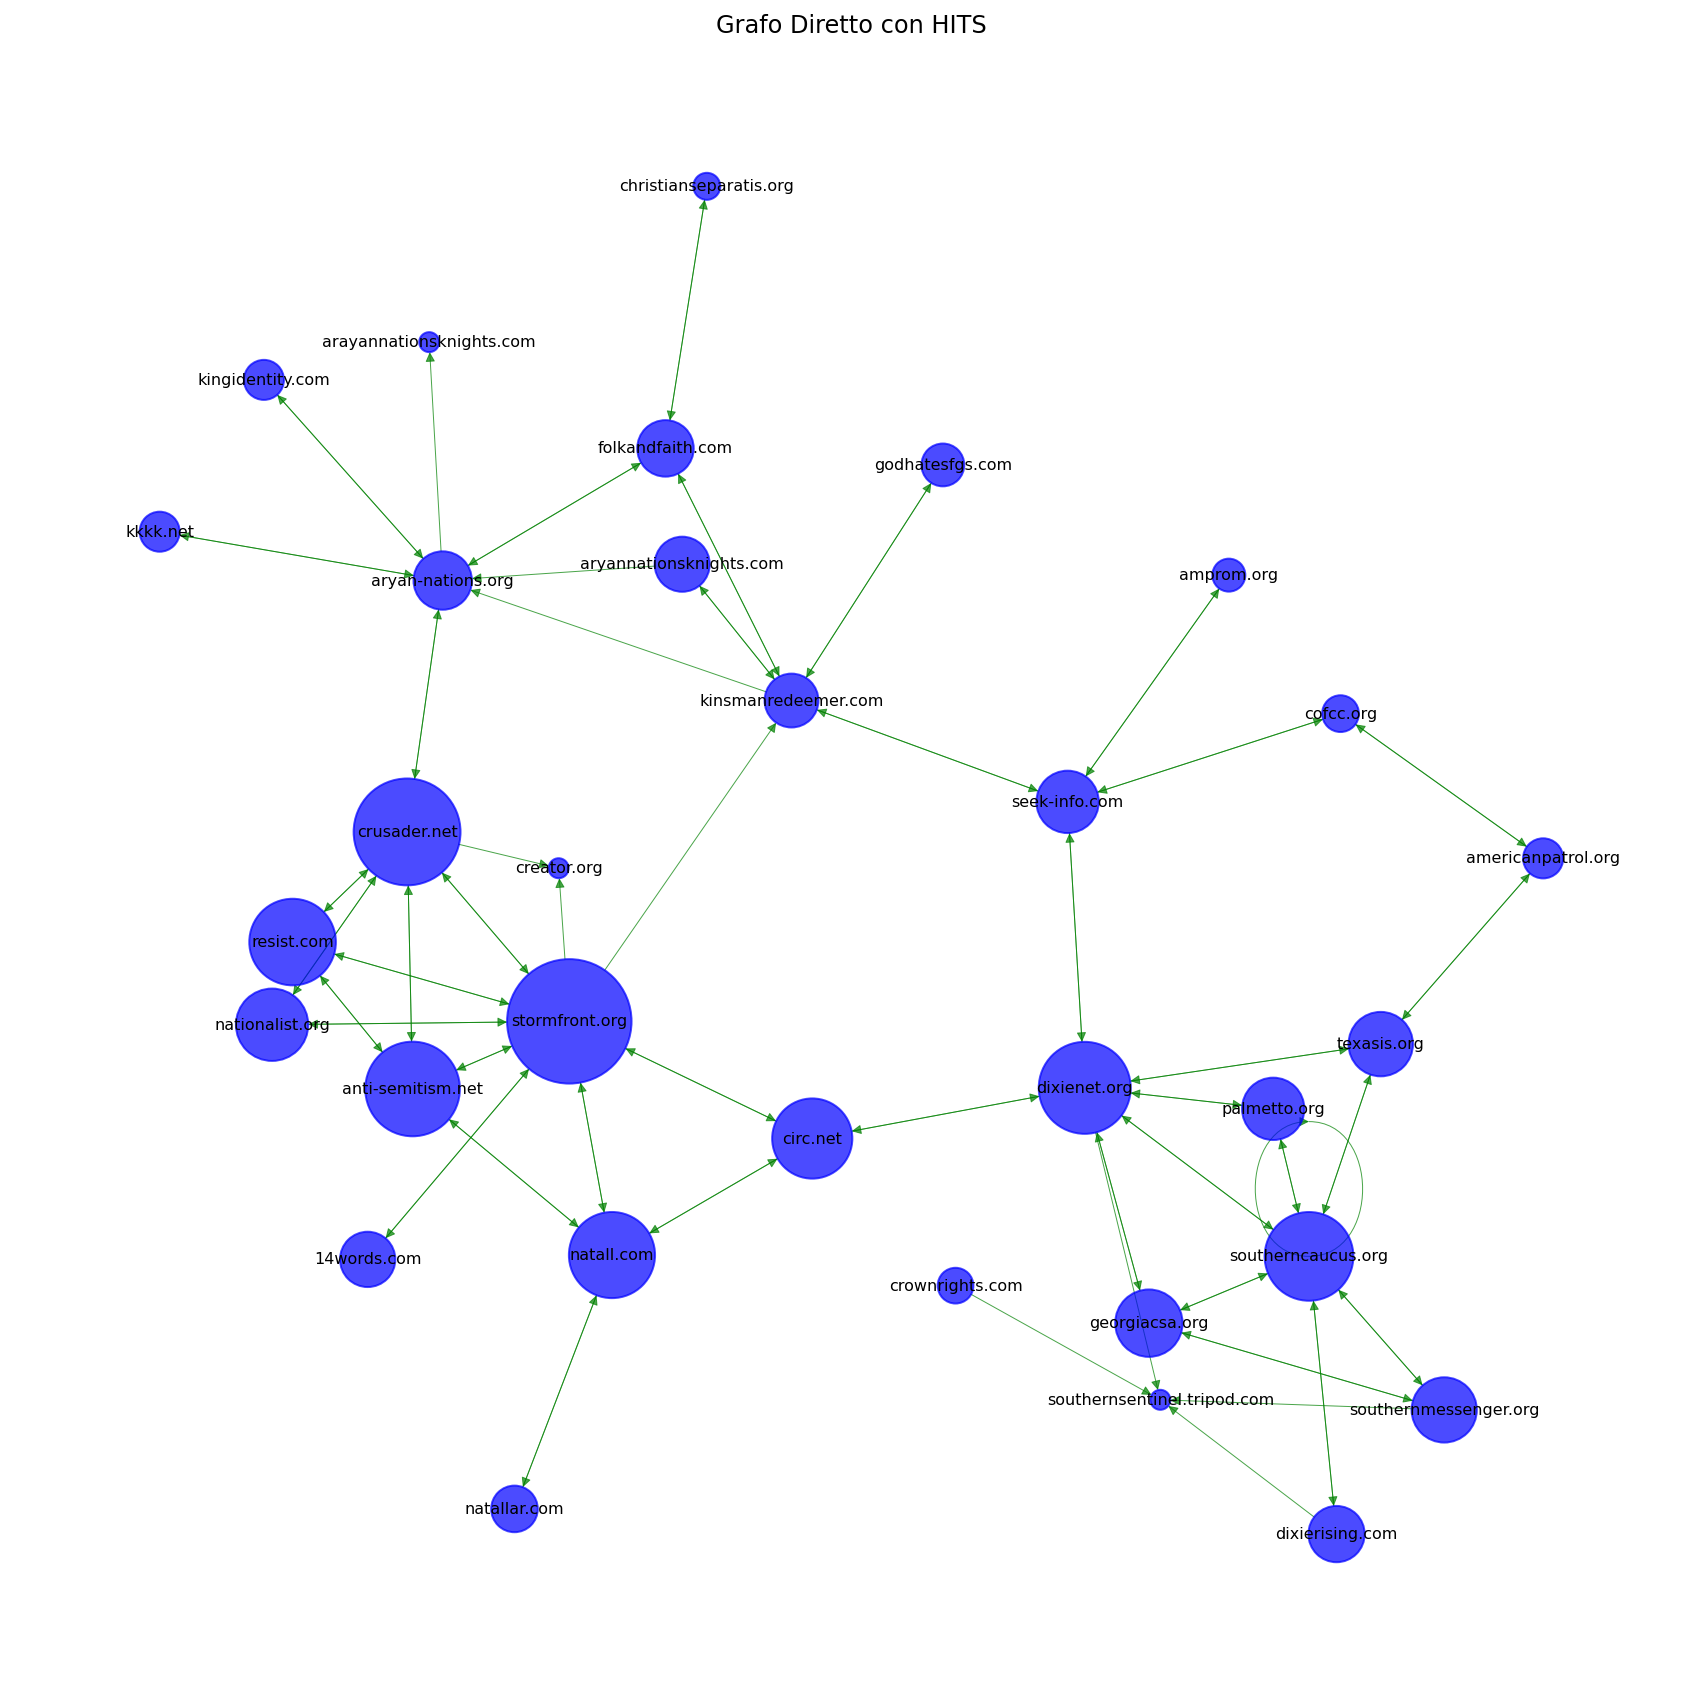

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcola i punteggi HITS (ritorna due dizionari per autorità e hub)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Scegli se utilizzare i punteggi di autorità o hub per la dimensione dei nodi
# In questo esempio, usiamo i punteggi di hubs
node_size = [hubs[n] * 30000 + 100 for n in G_directed.nodes()]

# Visualizza il grafo con i punteggi HITS
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto con HITS')
plt.show()


#### Calcolo n archi con valori di HITS Centrality maggiori \(hub\)



In [37]:
import networkx as nx

# Supponendo che G_directed sia il tuo grafo diretto già definito

# Calcola i punteggi HITS (hubs e authorities)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Numero di nodi da stampare
n = 10

# Ordina i nodi per punteggio di hubs e seleziona i primi n
top_n_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:n]

# Stampa i primi n siti con il maggior valore di autorità
print(f"Classifica {n} siti con il maggior valore di autorità:")
for i, (node, hubs_score) in enumerate(top_n_hubs, start=1):
    print(f"{i}. Sito: {node}, Hub-score: {hubs_score}")


Classifica 10 siti con il maggior valore di autorità:
1. Sito: stormfront.org, Hub-score: 0.12576246595521348
2. Sito: crusader.net, Hub-score: 0.09188530947350222
3. Sito: anti-semitism.net, Hub-score: 0.07133106347486169
4. Sito: dixienet.org, Hub-score: 0.0672312549670484
5. Sito: southerncaucus.org, Hub-score: 0.0623151934287418
6. Sito: resist.com, Hub-score: 0.05917893249373306
7. Sito: natall.com, Hub-score: 0.05852426233229979
8. Sito: circ.net, Hub-score: 0.05026318144487615
9. Sito: nationalist.org, Hub-score: 0.04029015100657157
10. Sito: georgiacsa.org, Hub-score: 0.034535600556988046


#### Visualizzazione tramite Kamanda\-Kawai per closeness centrality \(nodi più grandi hanno valori di centrality maggiori\)



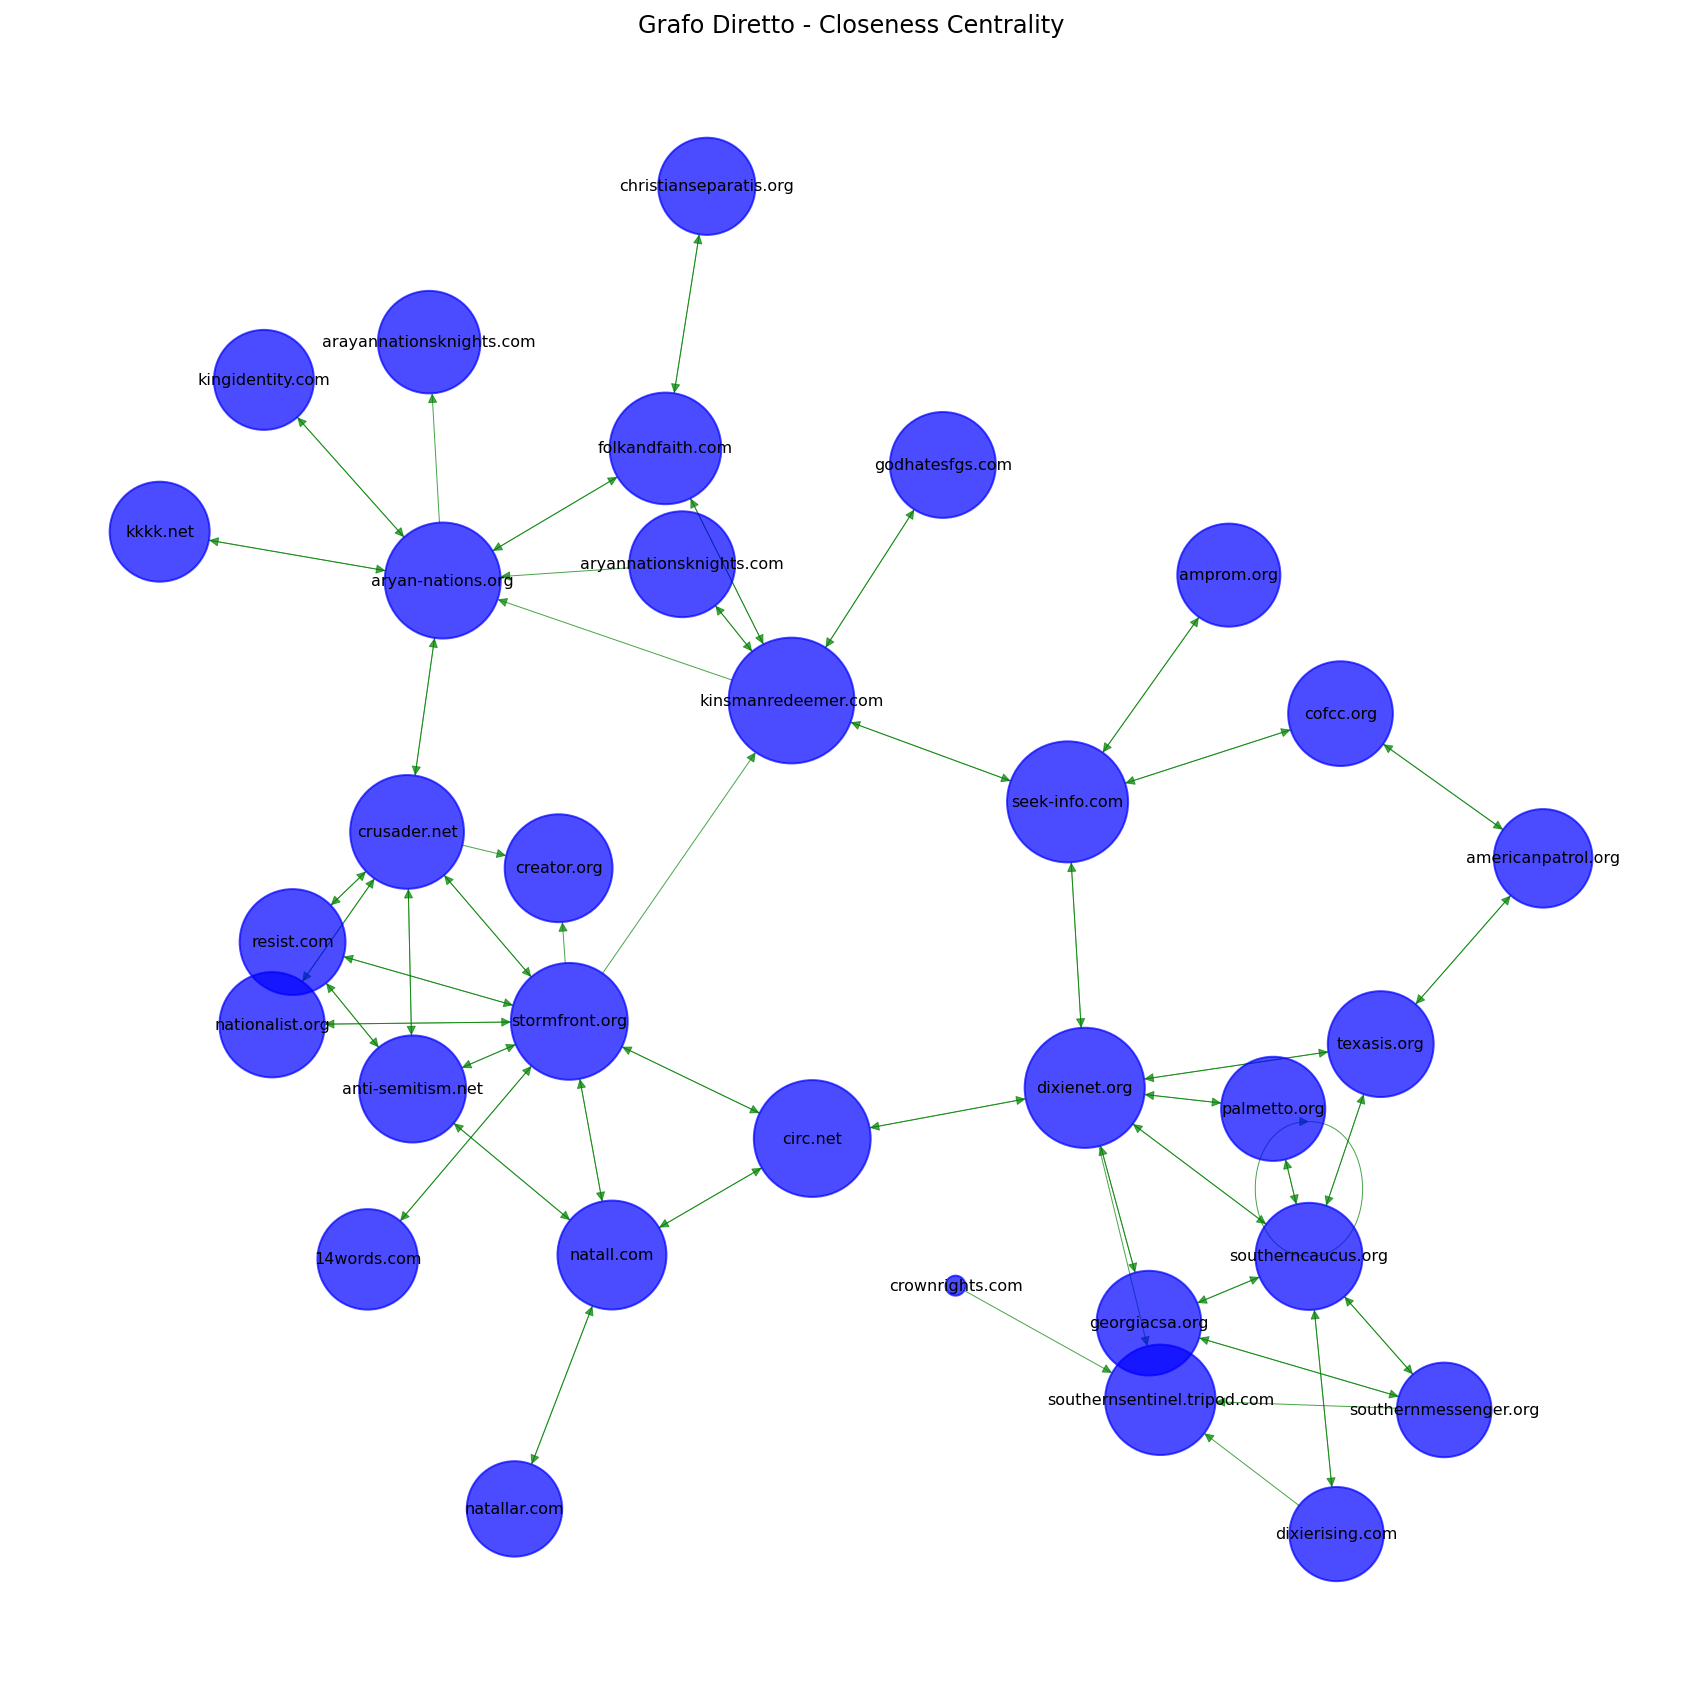

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola la centralità di closeness
closeness = nx.closeness_centrality(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di closeness
node_size = [v * 10000 + 100 for v in closeness.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Closeness Centrality')
plt.show()


### Classifica in base alla closeness centrality



In [39]:
n = 10    # numero di nodi da stampare
# Calcola la centralità di closeness
closeness_centrality = nx.closeness_centrality(G_directed)
# Ordina i nodi per closeness centrality e seleziona i primi n
top_n_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Closeness Centrality:")
for node, centrality in top_n_closeness_nodes:
    
    print(f"{i}. Sito: {node}, Closeness score: {centrality}")
    i+=1


Classifica 10 siti con il maggior valore di Closeness Centrality:
1. Sito: kinsmanredeemer.com, Closeness score: 0.3855103120042306
2. Sito: seek-info.com, Closeness score: 0.3563049853372434
3. Sito: dixienet.org, Closeness score: 0.35098700048146364
4. Sito: circ.net, Closeness score: 0.3312130849613812
5. Sito: stormfront.org, Closeness score: 0.3312130849613812
6. Sito: aryan-nations.org, Closeness score: 0.32661290322580644
7. Sito: crusader.net, Closeness score: 0.3135483870967742
8. Sito: folkandfaith.com, Closeness score: 0.3014888337468983
9. Sito: southernsentinel.tripod.com, Closeness score: 0.29488078541374474
10. Sito: natall.com, Closeness score: 0.2867820613690008


#### Visualizzazione tramite Kamanda\-Kawai per betweennes centrality \(nodi più grandi hanno valori di centrality maggiori\)



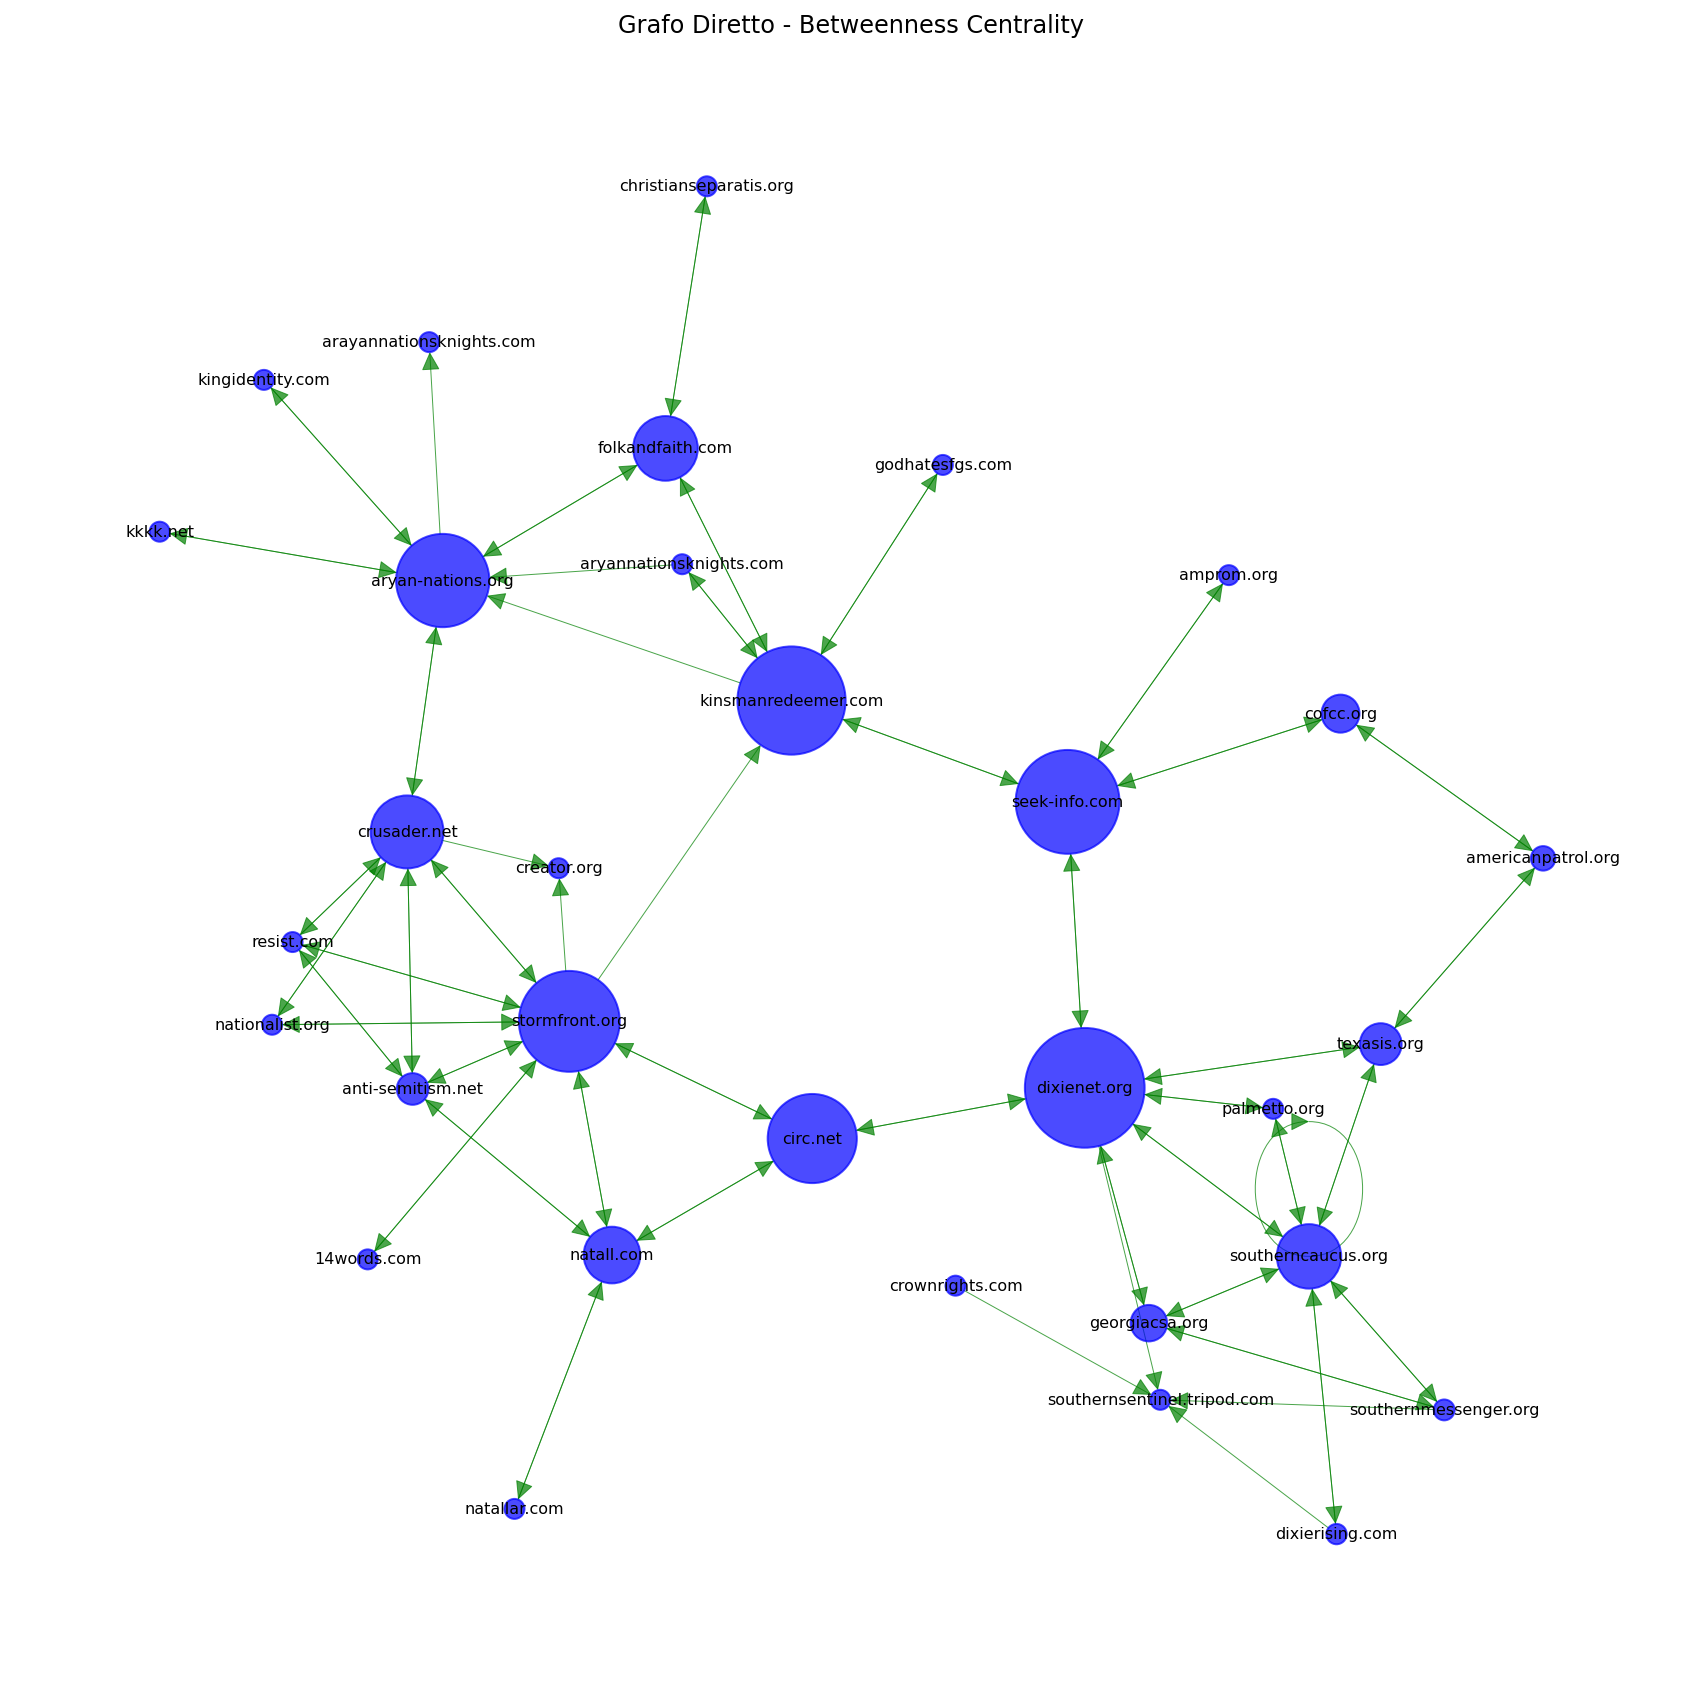

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola la centralità di betweenness
betweenness = nx.betweenness_centrality(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di betweenness
node_size = [v * 10000 +100 for v in betweenness.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Betweenness Centrality')
plt.show()


#### Calcolo della betweennes centrality \(Nodi con valori più grandi indicano che sono più presenti come nodi all'interno degli shortest paths tra nodi\)



In [41]:
import networkx as nx


n = 10    # numero di nodi da stampare
betweenness_centrality = nx.betweenness_centrality(G_directed)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Betweenness Centrality:")
for node, centrality in top_n_betweenness_nodes:
    
    print(f"{i}. Sito: {node}, Betweenness score: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Betweenness Centrality:
1. Sito: dixienet.org, Betweenness score: 0.3485663082437276
2. Sito: kinsmanredeemer.com, Betweenness score: 0.28279569892473116
3. Sito: seek-info.com, Betweenness score: 0.2596774193548387
4. Sito: stormfront.org, Betweenness score: 0.24444444444444446
5. Sito: aryan-nations.org, Betweenness score: 0.20770609318996414
6. Sito: circ.net, Betweenness score: 0.18870967741935485
7. Sito: crusader.net, Betweenness score: 0.12311827956989248
8. Sito: folkandfaith.com, Betweenness score: 0.09462365591397849
9. Sito: southerncaucus.org, Betweenness score: 0.09390681003584227
10. Sito: natall.com, Betweenness score: 0.07025089605734768


# Calcolo misure per gruppi di nodi



#### Clique \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [42]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare le clique
G_undirected = G_directed.to_undirected()

# Trova tutte le clique massimali nel grafo non diretto
cliques = list(nx.find_cliques(G_undirected))

# Stampa le clique trovate
print(f"Clique massimali trovate nel grafo:")
for clique in cliques:
    print(clique)


Clique massimali trovate nel grafo:
['arayannationsknights.com', 'aryan-nations.org']
['southerncaucus.org', 'dixierising.com']
['southerncaucus.org', 'dixienet.org', 'texasis.org']
['southerncaucus.org', 'dixienet.org', 'palmetto.org']
['southerncaucus.org', 'dixienet.org', 'georgiacsa.org']
['southerncaucus.org', 'southernmessenger.org', 'georgiacsa.org']
['stormfront.org', 'circ.net', 'natall.com']
['stormfront.org', 'crusader.net', 'nationalist.org']
['stormfront.org', 'crusader.net', 'anti-semitism.net', 'resist.com']
['stormfront.org', 'crusader.net', 'creator.org']
['stormfront.org', 'natall.com', 'anti-semitism.net']
['stormfront.org', '14words.com']
['stormfront.org', 'kinsmanredeemer.com']
['cofcc.org', 'americanpatrol.org']
['cofcc.org', 'seek-info.com']
['kingidentity.com', 'aryan-nations.org']
['godhatesfgs.com', 'kinsmanredeemer.com']
['texasis.org', 'americanpatrol.org']
['aryannationsknights.com', 'aryan-nations.org', 'kinsmanredeemer.com']
['amprom.org', 'seek-info.com

#### K\-core \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [43]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare i k-core
G_undirected = G_directed.to_undirected()

# Calcola i k-core del grafo per un valore specifico di k
k_value = 3
k_core_graph = nx.k_core(G_undirected, k=k_value)

# Estraiamo e stampiamo i nodi che compongono il k-core
k_core_nodes = k_core_graph.nodes()
print(f"I nodi che compongono il {k_value}-core sono:")
for node in k_core_nodes:
    print(node)


I nodi che compongono il 3-core sono:
resist.com
anti-semitism.net
stormfront.org
crusader.net


#### K\-components \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [44]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare i k-component
G_undirected = G_directed.to_undirected()

# Utilizziamo nx.k_components per trovare i k-component
k_components = nx.k_components(G_undirected)

# Stampa i k-component trovati
for k, components in k_components.items():
    print(f"Componenti con k={k}:")
    for component in components:
        print(component)


Componenti con k=3:
{'resist.com', 'anti-semitism.net', 'stormfront.org', 'crusader.net'}
Componenti con k=2:
{'southerncaucus.org', 'creator.org', 'circ.net', 'seek-info.com', 'southernsentinel.tripod.com', 'natall.com', 'georgiacsa.org', 'palmetto.org', 'aryan-nations.org', 'stormfront.org', 'cofcc.org', 'kinsmanredeemer.com', 'texasis.org', 'nationalist.org', 'aryannationsknights.com', 'dixienet.org', 'southernmessenger.org', 'resist.com', 'crusader.net', 'americanpatrol.org', 'folkandfaith.com', 'anti-semitism.net', 'dixierising.com'}
Componenti con k=1:
{'arayannationsknights.com', 'southerncaucus.org', 'natall.com', 'stormfront.org', 'cofcc.org', 'kinsmanredeemer.com', 'kingidentity.com', 'godhatesfgs.com', 'texasis.org', 'aryannationsknights.com', 'amprom.org', 'folkandfaith.com', 'americanpatrol.org', '14words.com', 'anti-semitism.net', 'creator.org', 'crownrights.com', 'circ.net', 'seek-info.com', 'southernsentinel.tripod.com', 'kkkk.net', 'georgiacsa.org', 'christianseparatis

#### Coefficienti di clustering \(globale e locale\) \(LO STA RENDENDO NON DIRETTO E NON STA TENEN CONTO DELLE DIREZIONI DEGLI ARCHI\)



In [45]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Per il coefficiente di clustering, possiamo lavorare con il grafo non diretto
G_undirected = G_directed.to_undirected()

# Calcola il coefficiente di clustering per ogni nodo
node_clustering = nx.clustering(G_undirected)

# Calcola il coefficiente di clustering medio del grafo
average_clustering = nx.average_clustering(G_undirected)

# Stampa il coefficiente di clustering per ogni nodo
print("Coefficienti di clustering per nodo:")
for node, coeff in node_clustering.items():
    print(f"Nodo {node}: {coeff}")

# Stampa il coefficiente di clustering medio del grafo
print(f"\nCoefficienti di clustering medio del grafo: {average_clustering}")


Coefficienti di clustering per nodo:
Nodo 14words.com: 0
Nodo americanpatrol.org: 0
Nodo amprom.org: 0
Nodo anti-semitism.net: 0.6666666666666666
Nodo arayannationsknights.com: 0
Nodo aryan-nations.org: 0.09523809523809523
Nodo aryannationsknights.com: 1.0
Nodo christianseparatis.org: 0
Nodo circ.net: 0.3333333333333333
Nodo cofcc.org: 0
Nodo creator.org: 1.0
Nodo crownrights.com: 0
Nodo crusader.net: 0.3333333333333333
Nodo dixienet.org: 0.14285714285714285
Nodo dixierising.com: 0
Nodo folkandfaith.com: 0.3333333333333333
Nodo georgiacsa.org: 0.6666666666666666
Nodo godhatesfgs.com: 0
Nodo kingidentity.com: 0
Nodo kinsmanredeemer.com: 0.13333333333333333
Nodo kkkk.net: 0
Nodo natall.com: 0.3333333333333333
Nodo natallar.com: 0
Nodo nationalist.org: 1.0
Nodo palmetto.org: 1.0
Nodo resist.com: 1.0
Nodo seek-info.com: 0
Nodo southerncaucus.org: 0.26666666666666666
Nodo southernmessenger.org: 0.3333333333333333
Nodo southernsentinel.tripod.com: 0
Nodo stormfront.org: 0.19444444444444445
N

#### Reciprocità



In [46]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Calcola la reciprocità dell'intero grafo diretto
graph_reciprocity = nx.reciprocity(G_directed)
print(f"Reciprocità del grafo: {graph_reciprocity}")


Reciprocità del grafo: 0.8863636363636364


#### Structural Equivalence \(i nodi restituiti sono quelli che hanno lo stesso insieme di nodi adiacenti in entrata e lo stesso insieme di nodi adiacenti in uscita\)



In [47]:
import networkx as nx

def structural_equivalence(graph):
    structural_equivalences = {}
    for node1 in graph.nodes():
        for node2 in graph.nodes():
            if node1 != node2:
                neighbors1_in = set(graph.predecessors(node1))
                neighbors1_out = set(graph.successors(node1))
                neighbors2_in = set(graph.predecessors(node2))
                neighbors2_out = set(graph.successors(node2))
                if neighbors1_in == neighbors2_in and neighbors1_out == neighbors2_out:
                    structural_equivalences[(node1, node2)] = True
                else:
                    structural_equivalences[(node1, node2)] = False
    return structural_equivalences

G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola l'equivalenza strutturale nel grafo diretto
structural_equivalences = structural_equivalence(G_directed)

# Stampa il risultato
print("Equivalenza Strutturale nel Grafo Diretto:")
for nodes, equivalent in structural_equivalences.items():
    if equivalent!=False:
        print(f"{nodes}: {equivalent}")


Equivalenza Strutturale nel Grafo Diretto:
('kingidentity.com', 'kkkk.net'): True
('kkkk.net', 'kingidentity.com'): True


#### Regular Equivalence \(i nodi restituiti sono quelli che puntano allo stesso tipo di nodi adiacenti in entrata e lo stesso tipo di nodi adiacenti in uscita \[NON DEVONO ESSERE NODI UGUALI, SOLO DELLO STESSO TIPO\] e i vicini dei vicini sono gli stessi per entrambi i nodi\)



In [48]:
import networkx as nx

def regular_equivalence(graph):
    regular_equivalences = {}
    for node1 in graph.nodes():
        for node2 in graph.nodes():
            if node1 != node2:
                neighbors1_in = set(graph.predecessors(node1))
                neighbors1_out = set(graph.successors(node1))
                neighbors2_in = set(graph.predecessors(node2))
                neighbors2_out = set(graph.successors(node2))
                
                # Ottieni i vicini dei vicini di node1
                neighbors1_in_neighbors = set()
                neighbors1_out_neighbors = set()
                for neighbor in neighbors1_in:
                    neighbors1_in_neighbors.update(set(graph.predecessors(neighbor)))
                for neighbor in neighbors1_out:
                    neighbors1_out_neighbors.update(set(graph.successors(neighbor)))
                
                # Ottieni i vicini dei vicini di node2
                neighbors2_in_neighbors = set()
                neighbors2_out_neighbors = set()
                for neighbor in neighbors2_in:
                    neighbors2_in_neighbors.update(set(graph.predecessors(neighbor)))
                for neighbor in neighbors2_out:
                    neighbors2_out_neighbors.update(set(graph.successors(neighbor)))
                
                # Verifica l'equivalenza regolare
                if neighbors1_in_neighbors == neighbors2_in_neighbors and neighbors1_out_neighbors == neighbors2_out_neighbors:
                    regular_equivalences[(node1, node2)] = True
                else:
                    regular_equivalences[(node1, node2)] = False
    return regular_equivalences

# Calcola l'equivalenza regolare nel grafo diretto
regular_equivalences = regular_equivalence(G_directed)

# Stampa il risultato
print("Equivalenza Regolare nel Grafo Diretto:")
for nodes, equivalent in regular_equivalences.items():
    if equivalent:
        print(f"{nodes}: {equivalent}")


Equivalenza Regolare nel Grafo Diretto:
('dixierising.com', 'southernmessenger.org'): True
('georgiacsa.org', 'palmetto.org'): True
('kingidentity.com', 'kkkk.net'): True
('kkkk.net', 'kingidentity.com'): True
('nationalist.org', 'resist.com'): True
('palmetto.org', 'georgiacsa.org'): True
('resist.com', 'nationalist.org'): True
('southernmessenger.org', 'dixierising.com'): True


#### Homophily and Assortative Mixing \- by Degree



In [49]:
import networkx as nx

# Calcolo dell'homophily basato sul grado
def homophily_by_degree(graph):
    # Calcolo del coefficiente di assortatività basato sul grado
    assortativity = nx.degree_assortativity_coefficient(graph)
    return assortativity

# Calcolo dell'assortative mixing basato sul grado
def assortative_mixing_by_degree(graph):
    # Calcolo dell'assortative mixing basato sul grado
    assortative_mixing = nx.degree_pearson_correlation_coefficient(graph)
    return assortative_mixing

# Calcola l'homophily e l'assortative mixing basati sul grado per il grafo diretto
homophily_degree = homophily_by_degree(G_directed)
assortative_mixing_degree = assortative_mixing_by_degree(G_directed)

# Stampa i risultati
print("Homophily by Degree:", homophily_degree)
print("Assortative Mixing by Degree:", assortative_mixing_degree)


Homophily by Degree: -0.3123167430859305
Assortative Mixing by Degree: -0.3123167430859306


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base al numero di archi entranti \(in\-degree\) con COLORE \(nodi più grandi hanno un numero maggiore di archi entranti, misuro così la popolarità\)



/tmp/ipykernel_227/48108358.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Centralità di Grado in Entrata Normalizzata')


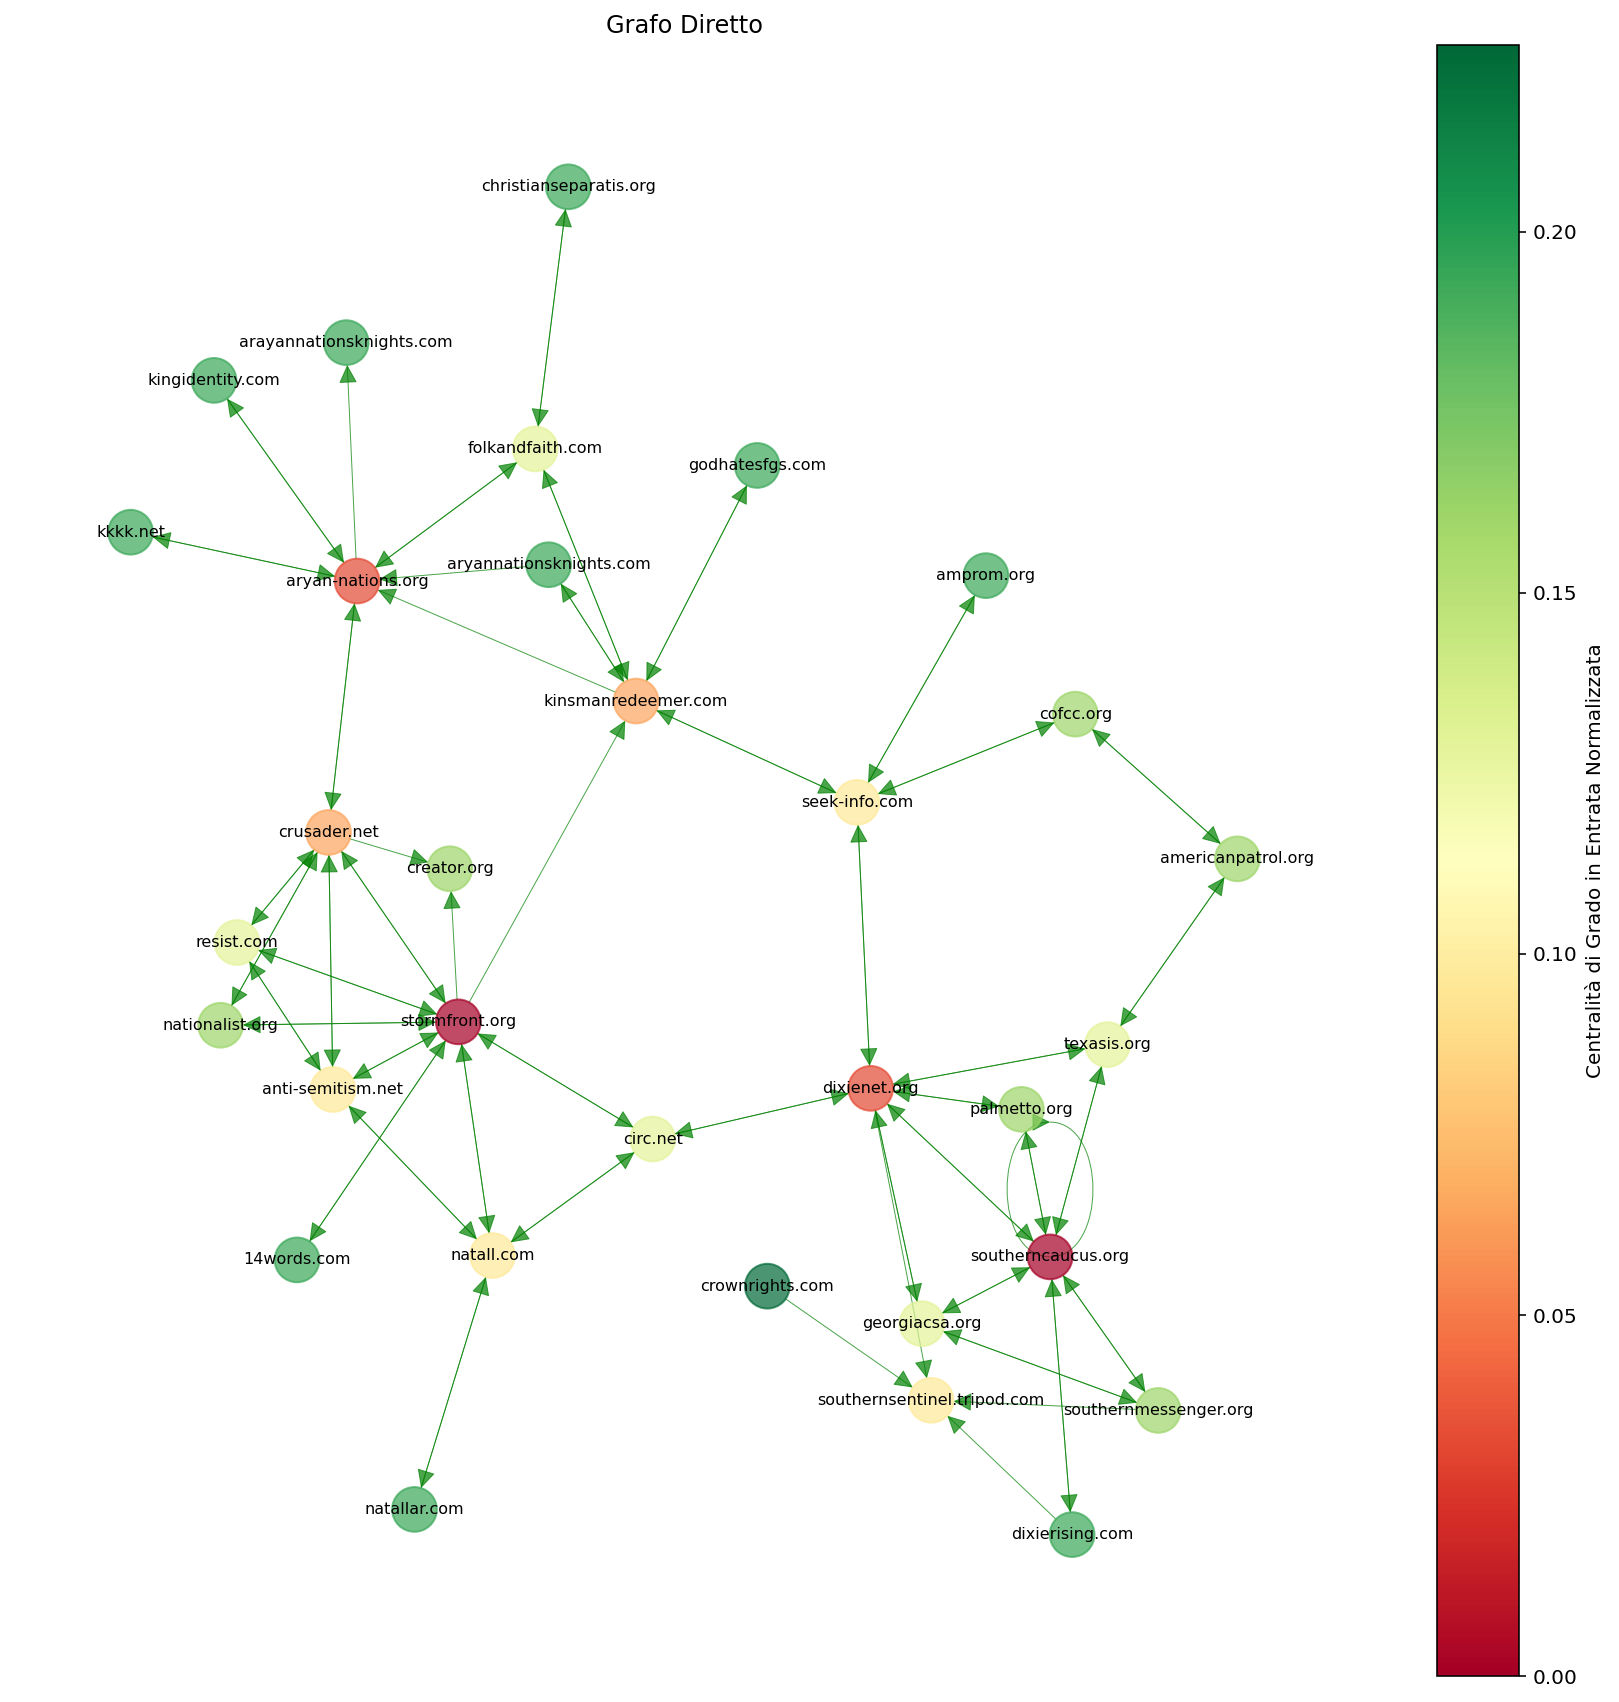

In [50]:
# SBAGLIATO, LA LEGENDA E' iINVERTITA

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Assumiamo che G_directed sia già definito e posizionato

# Calcoliamo la centralità di grado in entrata per ogni nodo e normalizziamola
in_degree_centrality = nx.in_degree_centrality(G_directed)
max_centrality = max(in_degree_centrality.values())
min_centrality = min(in_degree_centrality.values())
norm_centrality = {k: (v - min_centrality) / (max_centrality - min_centrality) for k, v in in_degree_centrality.items()}

# Creiamo una lista di colori per i nodi basata sulla loro centralità
node_color = [plt.cm.RdYlGn(1 - norm_centrality[node]) for node in G_directed.nodes()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=500, node_color=node_color, alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, node_size=500, alpha=0.7, edge_color='green', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# Creiamo un oggetto ScalarMappable per la legenda
sm = ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=min_centrality, vmax=max_centrality))
sm.set_array([])  # Puoi anche passare l'array dei valori di centralità qui
plt.colorbar(sm, label='Centralità di Grado in Entrata Normalizzata')

plt.axis('off')
plt.title('Grafo Diretto')
plt.show()


# METRICHE E MISURE SLIDES L06



#### Visualizzazione tramite Kamanda\-Kawai per Coefficient clustering \(nodi più grandi hanno valori maggiori\)

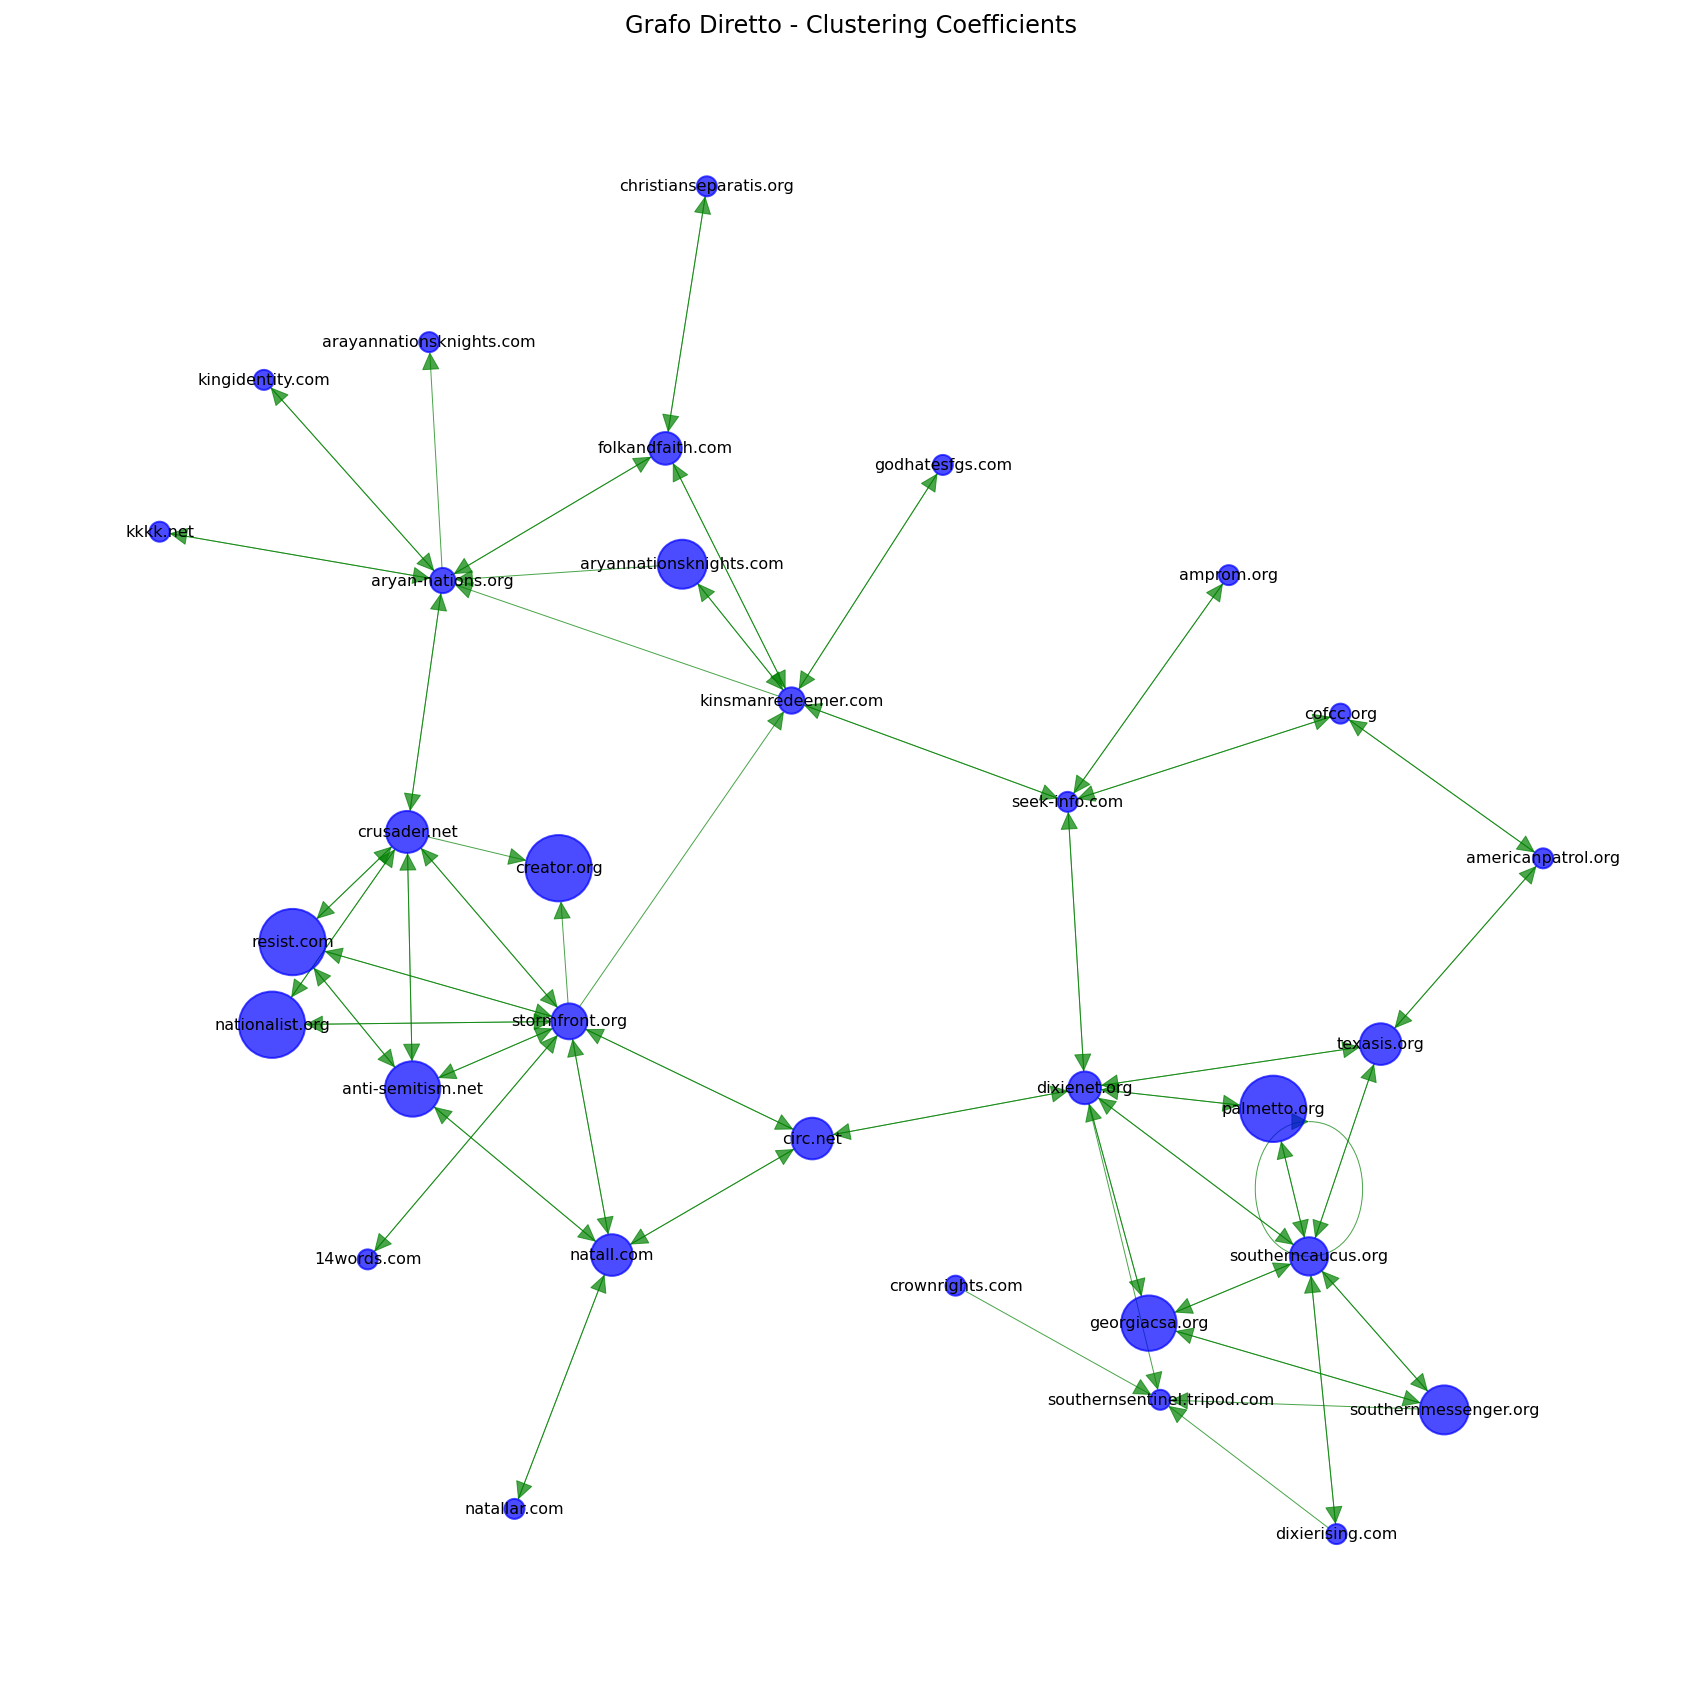

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola i clustering coefficients
clustering = nx.clustering(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base al coefficiente di clustering
node_size = [v * 1000 +100 for v in clustering.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size, alpha=0.7, edge_color='green', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Clustering Coefficients')
plt.show()


#### Calcolo del Clustering Coefficient \-&gt; identifica i nodi che sono più connessi tra loro rispetto agli altri nodi \(comunità\)



In [52]:
import networkx as nx

n = 10    # numero di nodi da stampare
clustering_coef = nx.clustering(G_directed)
# Ordina i nodi per coefficient_clustering 
top_n_clustering_coef_nodes = sorted(clustering_coef.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Clustering Coefficient:")
for node, centrality in top_n_clustering_coef_nodes:
    
    print(f"{i}. Sito: {node}, Clustering coefficient: {centrality}")
    i+=1
    
    
# Calcola il coefficiente di clustering medio del grafo diretto
average_clustering_directed = nx.average_clustering(G_directed)

# Stampa il coefficiente di clustering medio
print(f"\nCoefficienti di clustering medio del grafo: {average_clustering_directed}")

Classifica 10 siti con il maggior valore di Clustering Coefficient:
1. Sito: creator.org, Clustering coefficient: 1.0
2. Sito: nationalist.org, Clustering coefficient: 1.0
3. Sito: palmetto.org, Clustering coefficient: 1.0
4. Sito: resist.com, Clustering coefficient: 1.0
5. Sito: anti-semitism.net, Clustering coefficient: 0.6666666666666666
6. Sito: georgiacsa.org, Clustering coefficient: 0.6666666666666666
7. Sito: aryannationsknights.com, Clustering coefficient: 0.5
8. Sito: southernmessenger.org, Clustering coefficient: 0.5
9. Sito: crusader.net, Clustering coefficient: 0.34
10. Sito: circ.net, Clustering coefficient: 0.3333333333333333

Coefficienti di clustering medio del grafo: 0.26958020414079725


#### Calcolo della Reciprocità -->   misura  quanto le relazioni in un grafo siano reciproche. la probabilità che un nodo sia collegato a un altro nodo che è a sua volta collegato a esso.

In [53]:
reciprocities = nx.reciprocity(G_directed)
# Ordina i nodi per coefficient_clustering 
#top_n_reciprocities_nodes = sorted(reciprocities.data(), key=lambda x: x[1], reverse=True)[:n]
print(reciprocities)

0.8764044943820225


### Degre Distribution \(utile per capire la distribuzione del valore di degree\-in e degree\-out dei vari nodi\)



{'14words.com': 1, 'americanpatrol.org': 2, 'amprom.org': 1, 'anti-semitism.net': 4, 'arayannationsknights.com': 0, 'aryan-nations.org': 5, 'aryannationsknights.com': 2, 'christianseparatis.org': 1, 'circ.net': 3, 'cofcc.org': 2, 'creator.org': 0, 'crownrights.com': 1, 'crusader.net': 6, 'dixienet.org': 7, 'dixierising.com': 2, 'folkandfaith.com': 3, 'georgiacsa.org': 3, 'godhatesfgs.com': 1, 'kingidentity.com': 1, 'kinsmanredeemer.com': 5, 'kkkk.net': 1, 'natall.com': 4, 'natallar.com': 1, 'nationalist.org': 2, 'palmetto.org': 2, 'resist.com': 3, 'seek-info.com': 4, 'southerncaucus.org': 7, 'southernmessenger.org': 3, 'southernsentinel.tripod.com': 0, 'stormfront.org': 9, 'texasis.org': 3}


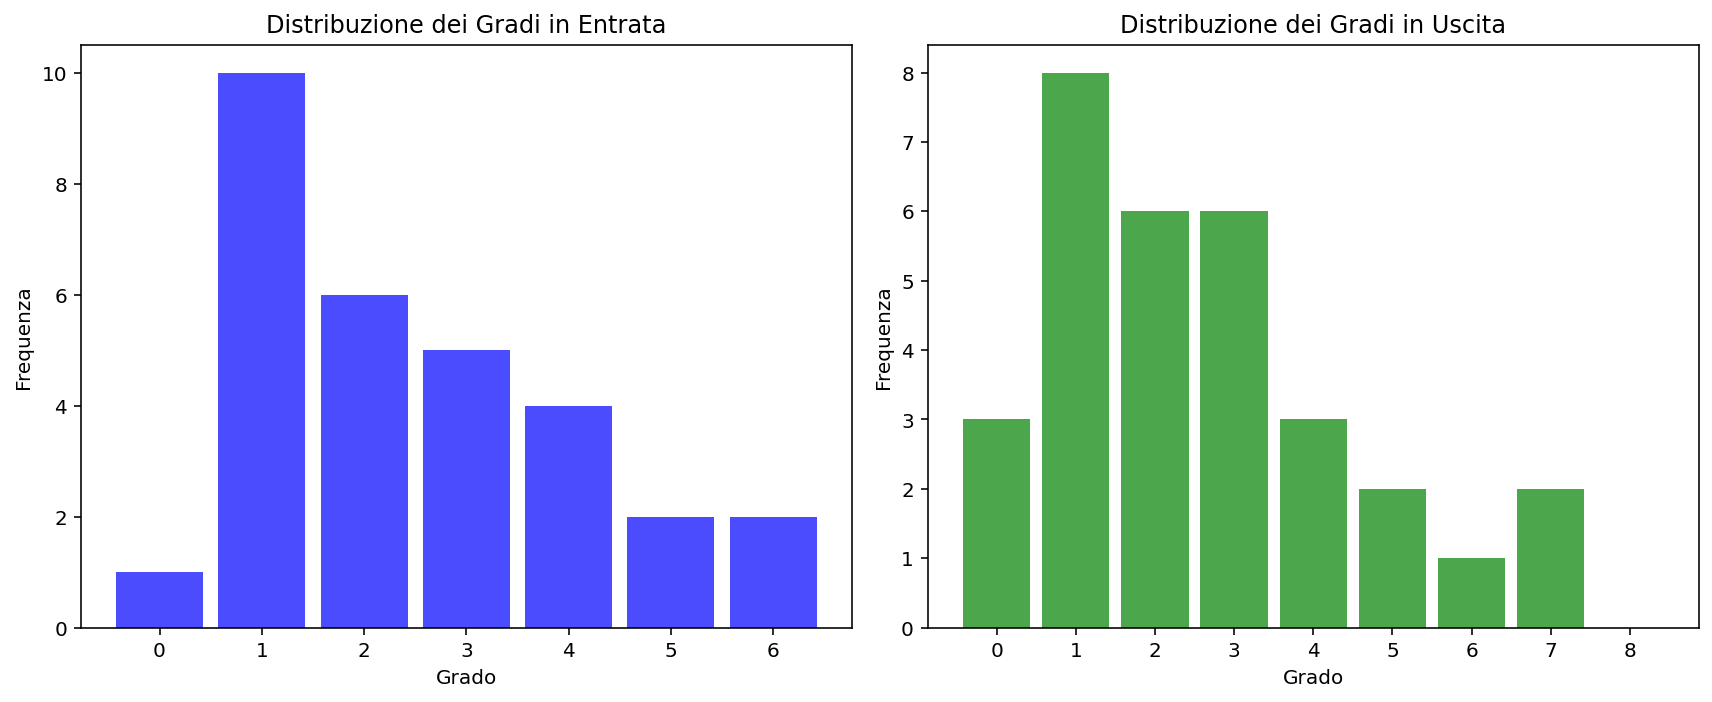

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Supponendo che G_directed sia il tuo grafo diretto
in_degrees = dict(G_directed.in_degree())  # Gradi in entrata
out_degrees = dict(G_directed.out_degree())  # Gradi in uscita


print(out_degrees)
# Estrai solo i valori dei gradi per la visualizzazione
in_values = list(in_degrees.values())
out_values = list(out_degrees.values())

# Crea gli istogrammi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(in_values, bins=np.arange(max(in_values)+1) - 0.5, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Distribuzione dei Gradi in Entrata')
plt.xlabel('Grado')
plt.ylabel('Frequenza')
plt.xticks(np.arange(min(in_values), max(in_values), 1))

plt.subplot(1, 2, 2)
plt.hist(out_values, bins=np.arange(max(out_values)+1) - 0.5, color='green', alpha=0.7, rwidth=0.85)
plt.title('Distribuzione dei Gradi in Uscita')
plt.xlabel('Grado')
plt.ylabel('Frequenza')
plt.xticks(np.arange(min(out_values), max(out_values), 1))


plt.tight_layout()
plt.show()


#### Calcolo Transitivity --> ( se A è collegato a B e B è collegato a C, la transitività suggerisce che è più probabile che A sia collegato a C rispetto a un nodo casuale nel grafo.) <br><br> la frazione di tutti i possibili triangoli presenti nel grafo (triade= 2 archi che condividono un nodo)

In [55]:
import networkx as nx

transitivity = nx.transitivity(G_directed)
print(transitivity)

0.24496644295302014


#### Triadic_Censius --> Insieme di 16 possibili tipi di triadi 

<ul>
  <li>003 = Triangolo </li>
  <li>012 = Triangolo aperto</li>
  <li>102 = Percorso </li>
  <li>021D, 021U, 021C = Triangolo con direzione </li>
  <li> 111D, 111U = Catena </li>
  <li> 030T = Triangolo simmetrico</li>
  <li> 030C = Triangolo simmetrico con direzione</li>
  <li> 201= Stella </li>
  <li> 120D, 120U, 120C = Forchetta</li>
  <li> 210 = Catena simmetrica </li>
  <li> 300 = Nodo vuoto</li>
</ul> 

In [56]:
import networkx as nx

triadic_census = nx.triadic_census(G_directed)

print("Triads  | Values:")
for key, value in triadic_census.items():

    print(f"{key}:\t| {value}")

Triads  | Values:
003:	| 3648
012:	| 232
102:	| 936
021D:	| 1
021U:	| 6
021C:	| 3
111D:	| 11
111U:	| 32
030T:	| 0
030C:	| 0
201:	| 77
120D:	| 0
120U:	| 2
120C:	| 0
210:	| 1
300:	| 11


#### Periphery (Periferia) --> La periferia è l'insieme dei nodi con eccentricità uguale al diametro

In [57]:
import networkx as nx

# periphery = nx.periphery(G_directed) questo codice da errore: Found infinite path length because the digraph is not strongly connected (Ci sono parti del grafo  raggiungere l'una l'altra, nemmeno indirettamente.)
# print(periphery)

#Calcolo la periferia all'interno delle componenti connesse forti:
for c in nx.strongly_connected_components(G_directed):
    periphery = nx.periphery(G_directed.subgraph(c))
    print(periphery)



['arayannationsknights.com']
['southernsentinel.tripod.com']
['creator.org']
['kingidentity.com', 'kkkk.net']
['crownrights.com']


# Prove cose strane



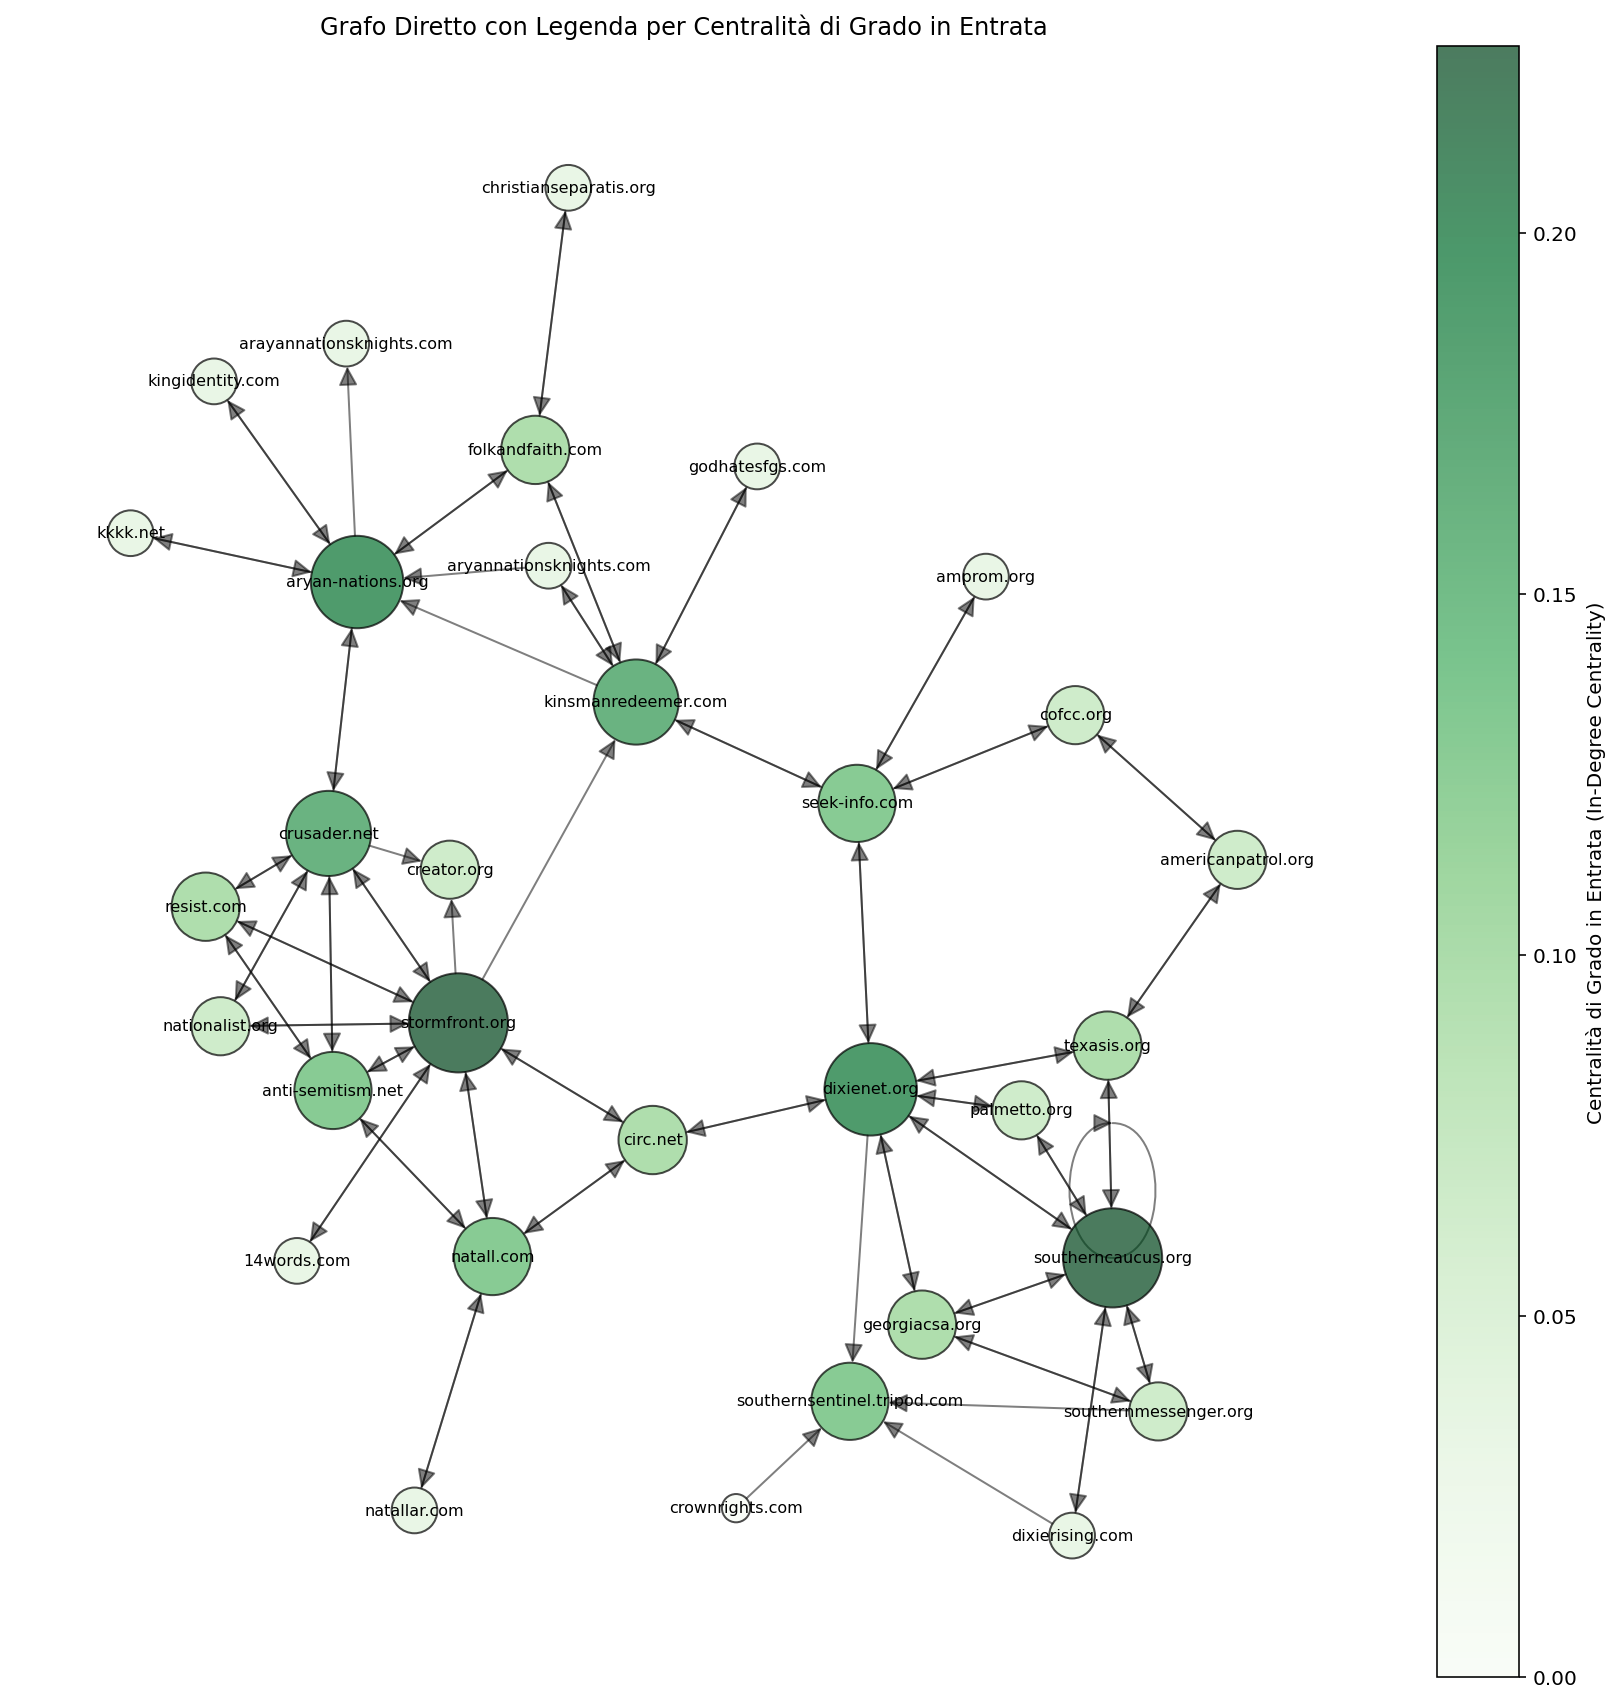

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Sostituisci questo con il tuo DataFrame reale.
# df_terror = pd.read_csv('il_tuo_file.csv')

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

pos['southerncaucus.org'] = (pos['southerncaucus.org'][0] + 0.1, pos['southerncaucus.org'][1])
pos['crownrights.com'] = (pos['crownrights.com'][0] - 0.05, pos['crownrights.com'][1] - 0.3)
pos['southernsentinel.tripod.com'] = (pos['southernsentinel.tripod.com'][0]-0.13, pos['southernsentinel.tripod.com'][1])
pos['resist.com'] = (pos['resist.com'][0] - 0.05, pos['resist.com'][1]+0.05)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
in_degrees = G_directed.in_degree()
in_degree_centrality = nx.in_degree_centrality(G_directed)
node_size = [v * 10000 + 200 for v in in_degree_centrality.values()]

# Mappa di colori basata sulla centralità di grado in entrata
colors = [in_degree_centrality.get(node, 0) for node in G_directed.nodes()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("black")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, arrowsize=20, alpha=0.5)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# Aggiungiamo una legenda che spiega la dimensione dei nodi
plt.colorbar(nodes, label='Centralità di Grado in Entrata (In-Degree Centrality)')

plt.axis('off') # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto con Legenda per Centralità di Grado in Entrata')
plt.show()

# Visualizzazione modificata di Kamada\-Kawai per "sistemare" i nodi in basso a destra e renderli più chiari! Sistemato anche il colore! Usare questa da ora in poi, se va bene



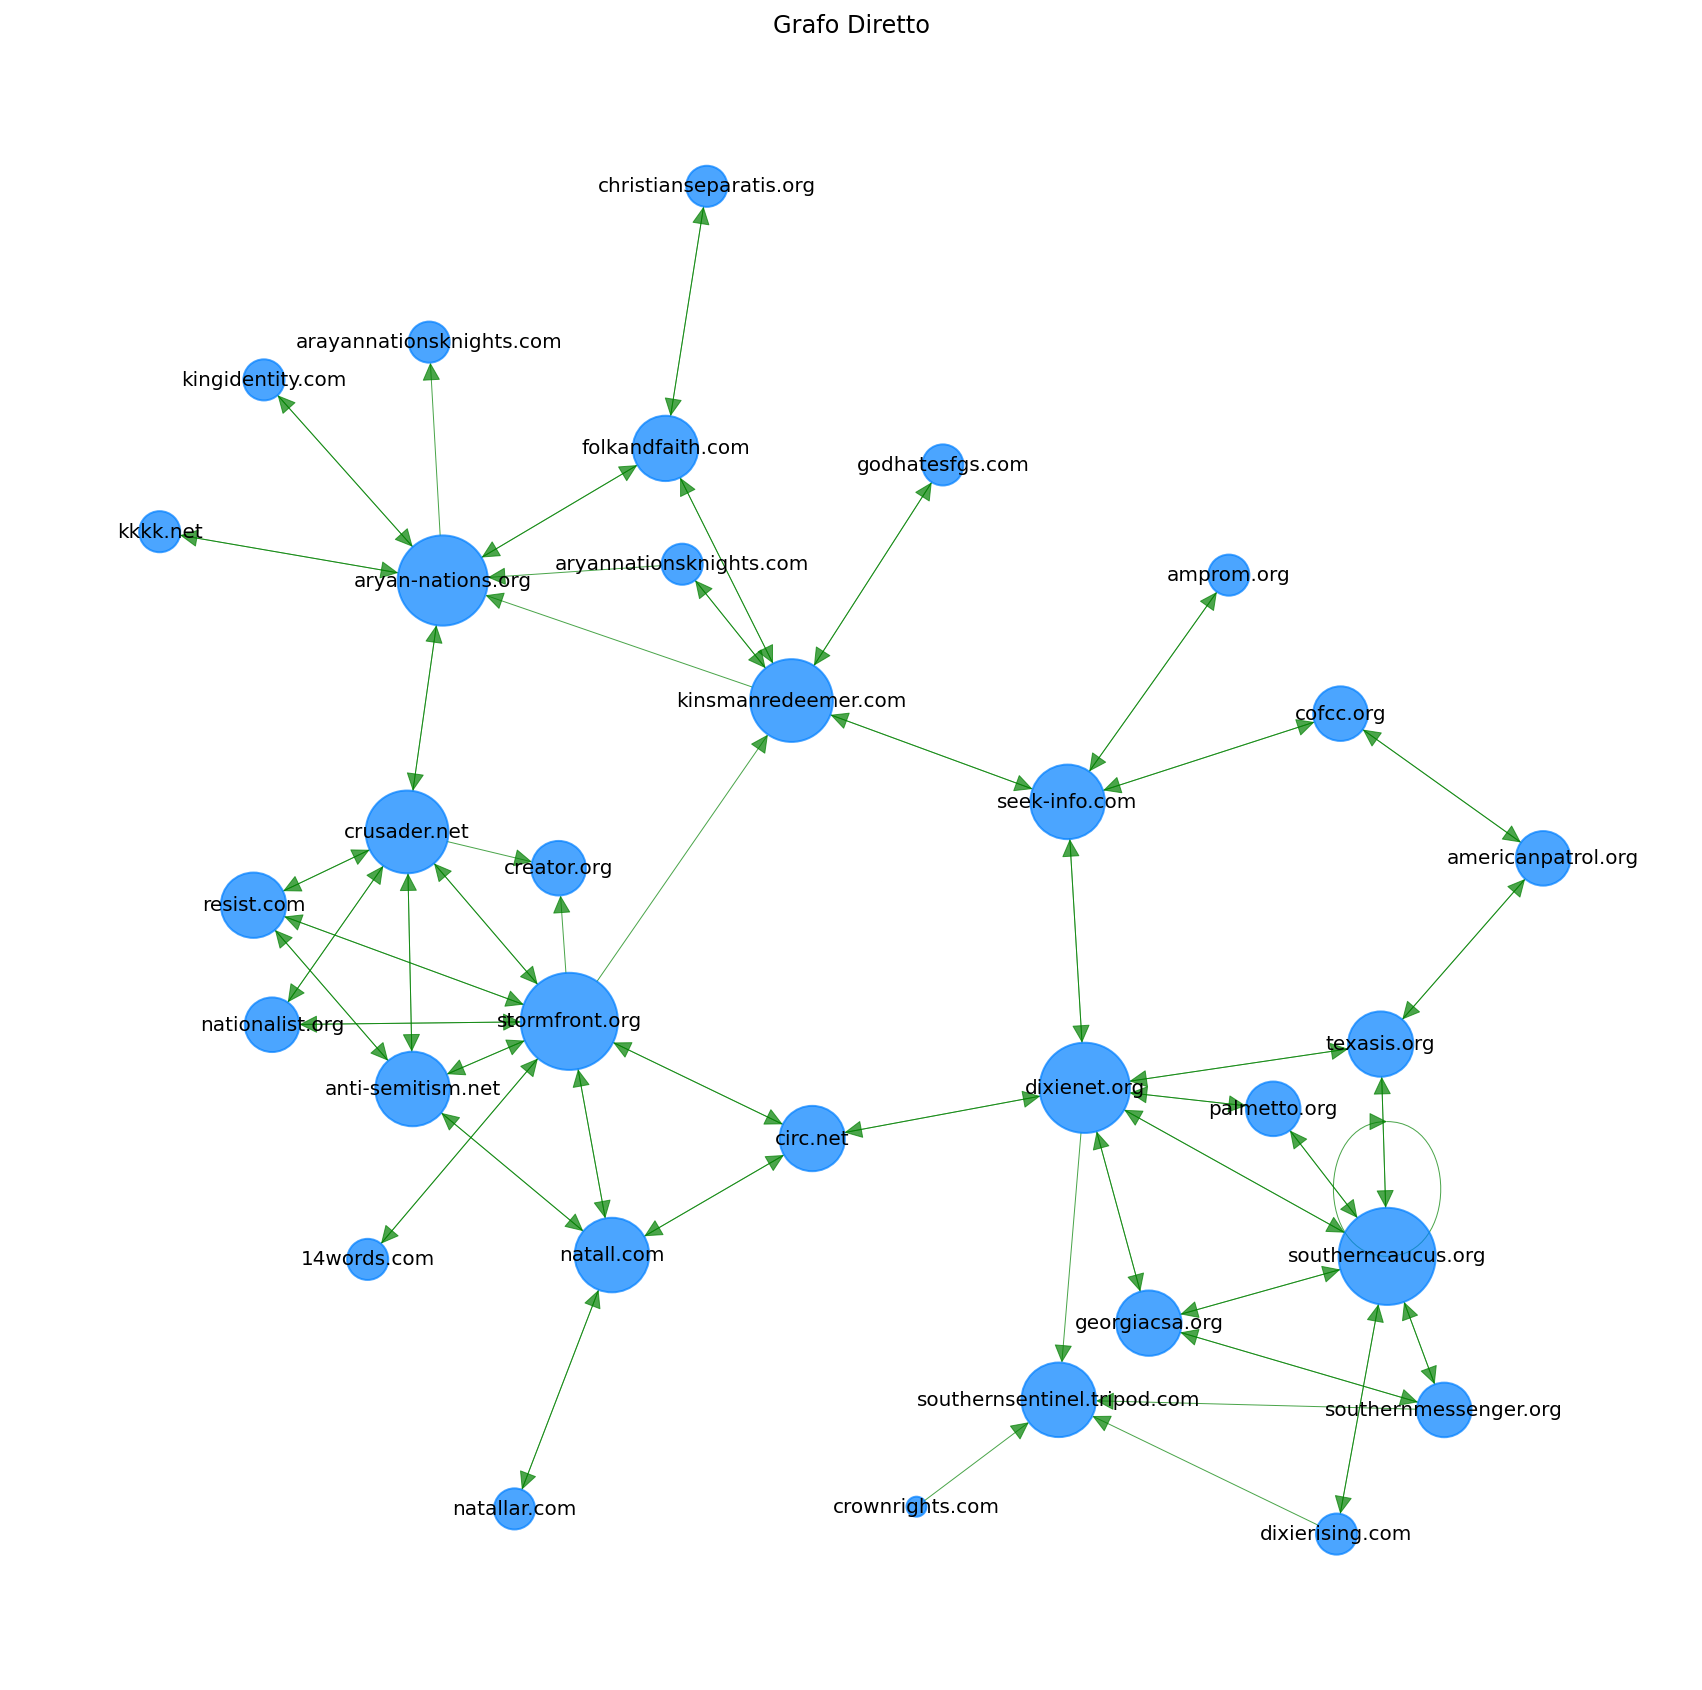

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

'''
pos['southerncaucus.org'] = (pos['southerncaucus.org'][0] + 0.1, pos['southerncaucus.org'][1])
pos['crownrights.com'] = (pos['crownrights.com'][0] - 0.05, pos['crownrights.com'][1] - 0.2)
pos['georgiacsa.org'] = (pos['georgiacsa.org'][0]-0.2, pos['georgiacsa.org'][1]+0.1)
pos['resist.com'] = (pos['resist.com'][0] - 0.05, pos['resist.com'][1]+0.05)
'''

pos['southerncaucus.org'] = (pos['southerncaucus.org'][0] + 0.1, pos['southerncaucus.org'][1])
pos['crownrights.com'] = (pos['crownrights.com'][0] - 0.05, pos['crownrights.com'][1] - 0.3)
pos['southernsentinel.tripod.com'] = (pos['southernsentinel.tripod.com'][0]-0.13, pos['southernsentinel.tripod.com'][1])
pos['resist.com'] = (pos['resist.com'][0] - 0.05, pos['resist.com'][1]+0.05)


# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.in_degree_centrality(G_directed).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='#007FFF', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size,alpha=0.7, edge_color='green', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G_directed, pos, font_size=10, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()

TEST  

